In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

- Simulating the case where we perform t-test after collecting each new data points and plot the p-value distribution with collection of data point

In [3]:
def get_p_values_with_increasing_sample_size(effect_size=0, 
                                             final_sample_size = 200,
                                             look_step = 1,
                                             print_detail=True):
    
    look_location = range(10, final_sample_size, look_step)
    x1 = np.random.normal(loc=0, scale=1, size=final_sample_size)
    x2 = np.random.normal(loc=effect_size, scale=1, size=final_sample_size)
    p_val = []
    for i in look_location:

        p_val.append(st.ttest_ind(x1[0:i], x2[0:i], equal_var=True)[1])
        
#     p_val = p_val[11:]
#     import pdb; pdb.set_trace()
    p_val = np.nan_to_num(p_val)
    lowest_p_val = np.min(p_val)
    lowest_p_val_at = np.argmin(p_val)
    p_val_below_alpha_first = np.argwhere(p_val<0.05)
    if print_detail:
        num_p_val_below_alpha = len(p_val_below_alpha_first)
        print("Lowest p-val {}".format(lowest_p_val))
        print("Lowest p-val at {}".format(lowest_p_val_at))
        if num_p_val_below_alpha > 0:
            print("n at which p-val goes below alpha(0.05) for the first time {}".format(
                p_val_below_alpha_first[0][0]))
            print("number of times p-val went below alpha(0.05) {}".format(num_p_val_below_alpha))
        else:
            print("p-val never went below alpha(0.05) in this simulation")
    return p_val, look_location
        

In [120]:
?plt.xticks

In [131]:
list(look_location)

[10, 50, 90, 130, 170]

In [4]:
def plot_p_val_with_increasing_sample_size(p_val, look_location):
    plt.figure(figsize=(20,5))
    plt.plot(look_location, p_val)
    plt.hlines(0.05, 0,list(look_location)[-1] , linestyles='dashed')
    plt.xlabel('sample size')
    plt.xlim(0,len(p_val))
    if len(look_location) < 10:
        plt.xticks(look_location)
    else:
        plt.xticks(range(10, len(p_val), int(len(p_val)/4)))
    plt.show()

Lowest p-val 0.0113193632271
Lowest p-val at 342
n at which p-val goes below alpha(0.05) for the first time 230
number of times p-val went below alpha(0.05) 195


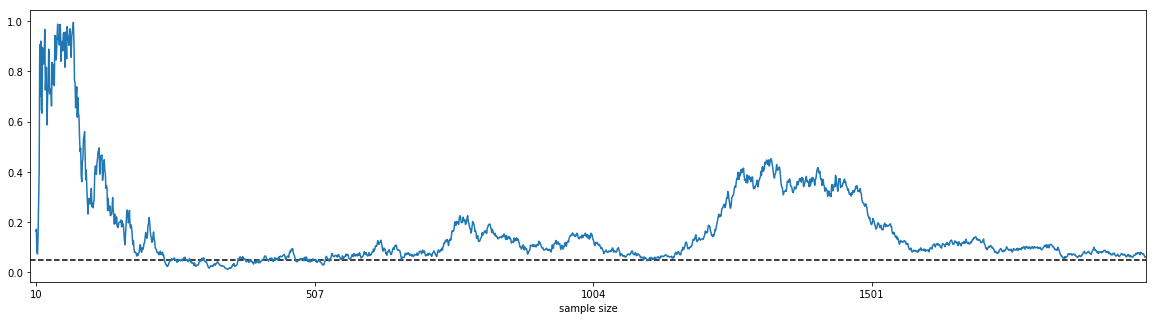

In [10]:
# p-val with increasing sample size, when there is no effect
p_val, look_location = get_p_values_with_increasing_sample_size(effect_size=0, 
                                                                final_sample_size=2000)

plot_p_val_with_increasing_sample_size(p_val, look_location)


Lowest p-val 0.036408627066
Lowest p-val at 0
n at which p-val goes below alpha(0.05) for the first time 0
number of times p-val went below alpha(0.05) 1


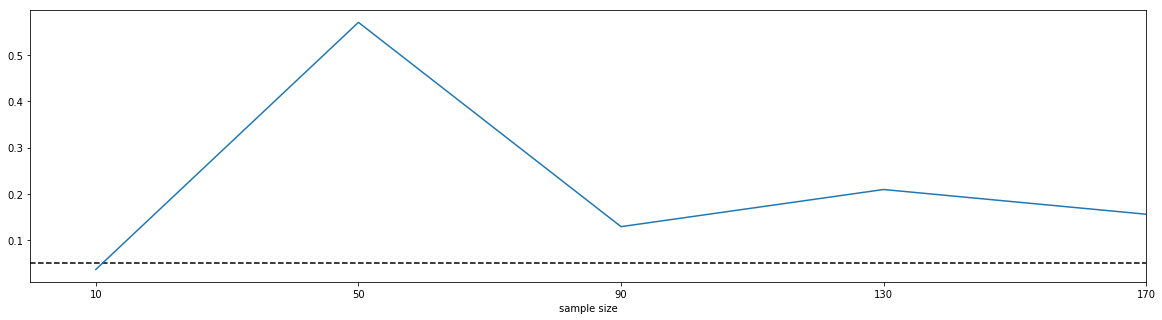

In [8]:
p_val, look_location=get_p_values_with_increasing_sample_size(effect_size=0, 
                                               final_sample_size=200, 
                                               look_step=40, 
                                               print_detail=True)
plot_p_val_with_increasing_sample_size(p_val, look_location)

In [135]:
#Q1
count=0
for i in range(0, 20):
    p_val, look_location = get_p_values_with_increasing_sample_size(effect_size=0, 
                                                                    final_sample_size=200, 
                                                                    print_detail=False)
    if np.min(p_val) < 0.05:
        count +=1 

In [136]:
count

5

Lowest p-val 0.00017111806212899005
Lowest p-val at 97
n at which p-val goes below alpha(0.05) for the first time 0
number of times p-val went below alpha(0.05) 151


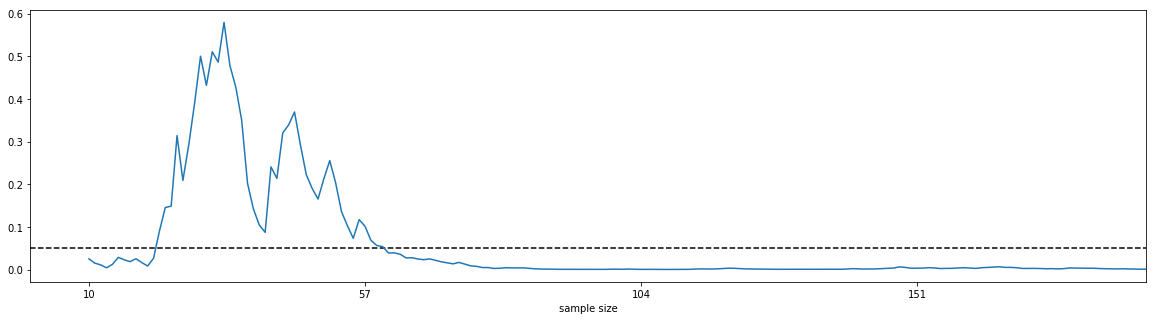

In [138]:
# p-val with increasing sample size, when there is no effect
p_val, look_location = get_p_values_with_increasing_sample_size(effect_size=0.3, final_sample_size=200)
plot_p_val_with_increasing_sample_size(p_val, look_location)

Lowest p-val 0.006426633365528094
Lowest p-val at 184
n at which p-val goes below alpha(0.05) for the first time 83
number of times p-val went below alpha(0.05) 79


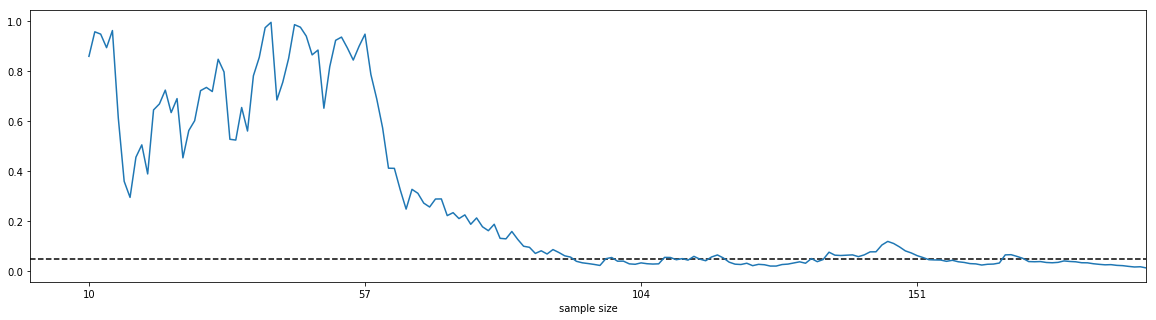

********************************************************************************
Lowest p-val 0.025434382312908763
Lowest p-val at 183
n at which p-val goes below alpha(0.05) for the first time 161
number of times p-val went below alpha(0.05) 29


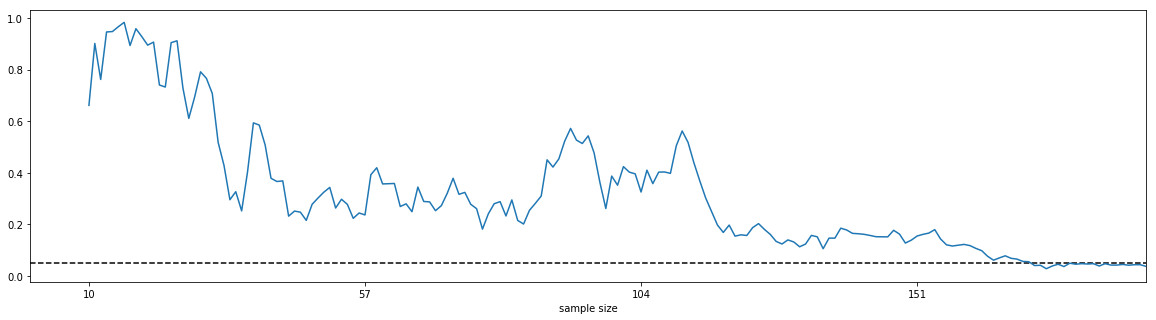

********************************************************************************
Lowest p-val 5.889690425615255e-05
Lowest p-val at 183
n at which p-val goes below alpha(0.05) for the first time 111
number of times p-val went below alpha(0.05) 79


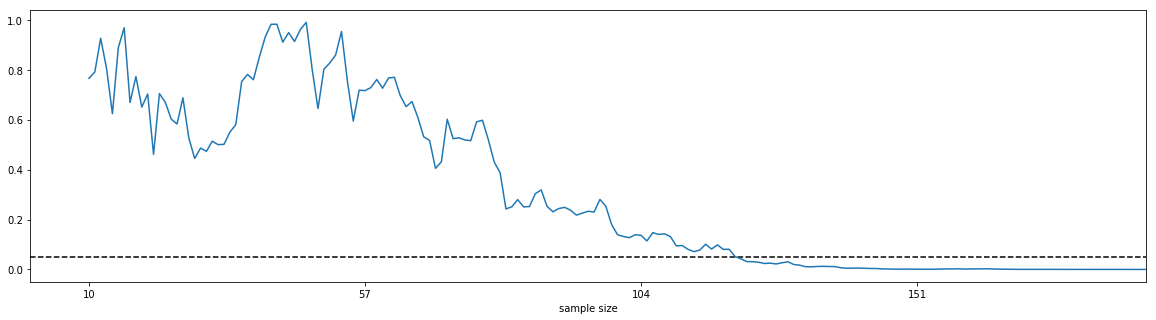

********************************************************************************
Lowest p-val 0.003140664446093024
Lowest p-val at 189
n at which p-val goes below alpha(0.05) for the first time 51
number of times p-val went below alpha(0.05) 88


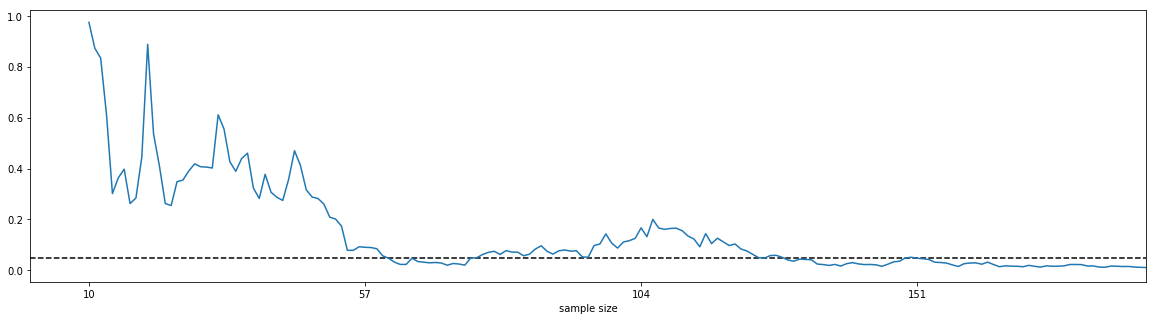

********************************************************************************
Lowest p-val 0.0001299308895197769
Lowest p-val at 186
n at which p-val goes below alpha(0.05) for the first time 10
number of times p-val went below alpha(0.05) 174


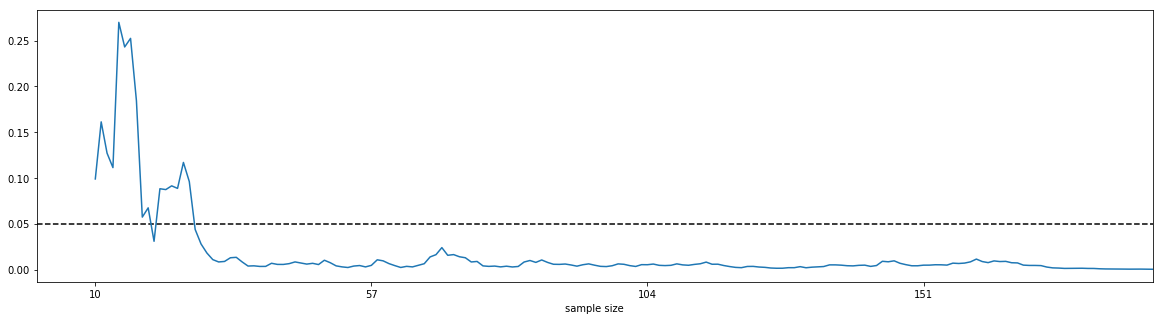

********************************************************************************
Lowest p-val 0.0002532018179761798
Lowest p-val at 126
n at which p-val goes below alpha(0.05) for the first time 52
number of times p-val went below alpha(0.05) 133


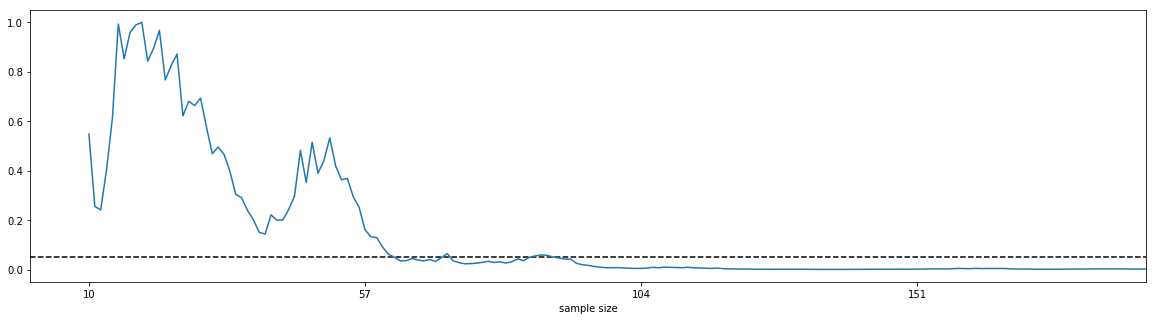

********************************************************************************
Lowest p-val 0.0008686245915315479
Lowest p-val at 120
n at which p-val goes below alpha(0.05) for the first time 53
number of times p-val went below alpha(0.05) 137


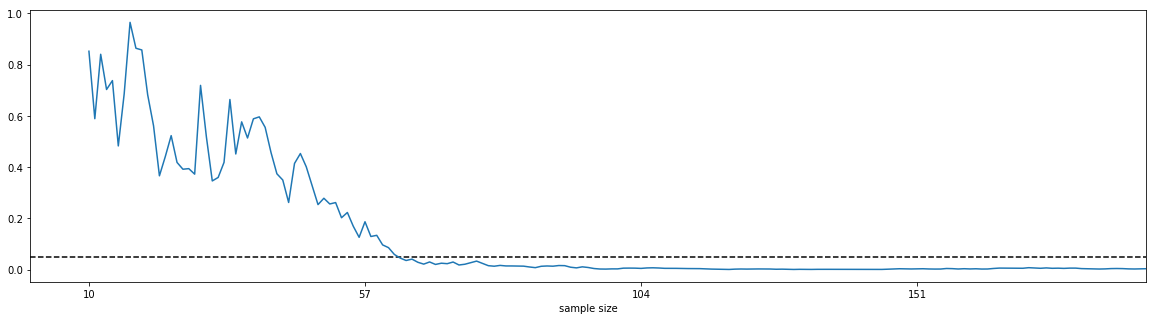

********************************************************************************
Lowest p-val 0.001848826736165965
Lowest p-val at 171
n at which p-val goes below alpha(0.05) for the first time 46
number of times p-val went below alpha(0.05) 138


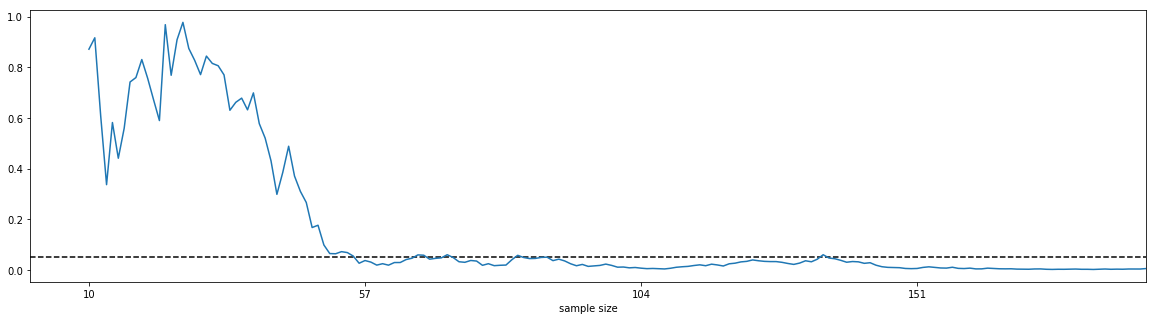

********************************************************************************
Lowest p-val 0.03139931144359632
Lowest p-val at 185
n at which p-val goes below alpha(0.05) for the first time 173
number of times p-val went below alpha(0.05) 13


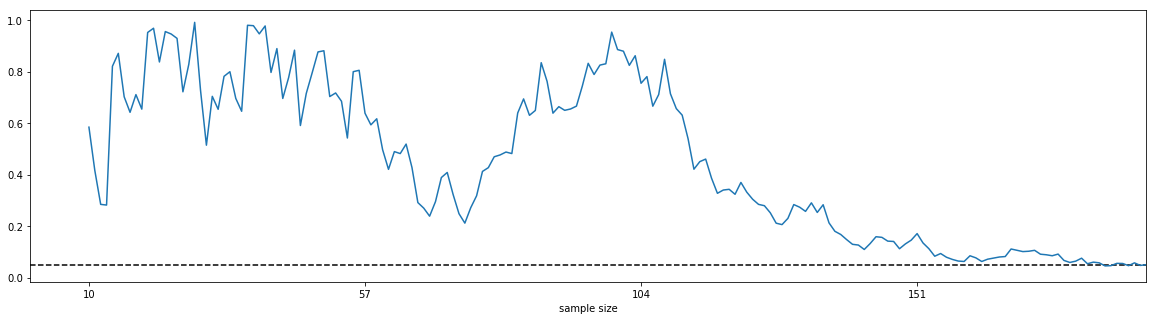

********************************************************************************
Lowest p-val 2.8858972090258e-07
Lowest p-val at 151
n at which p-val goes below alpha(0.05) for the first time 3
number of times p-val went below alpha(0.05) 187


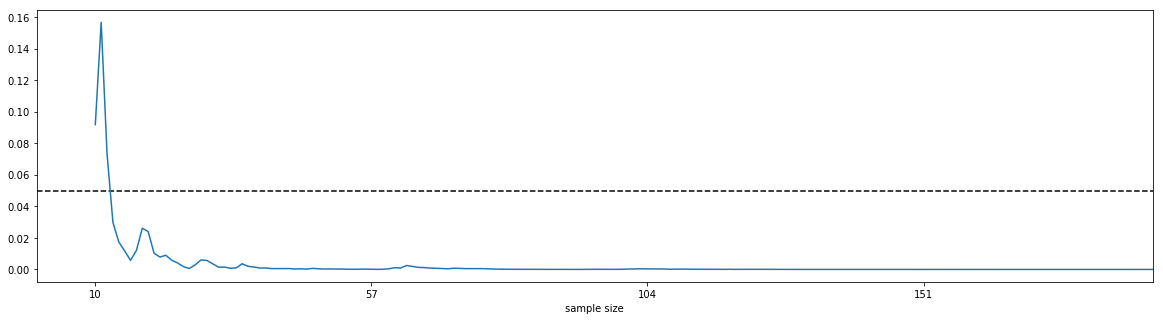

********************************************************************************
Lowest p-val 2.9775667900825594e-07
Lowest p-val at 173
n at which p-val goes below alpha(0.05) for the first time 3
number of times p-val went below alpha(0.05) 180


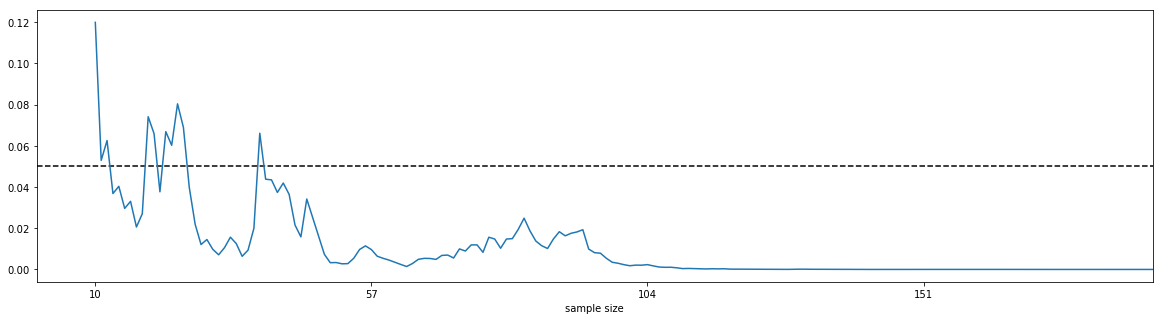

********************************************************************************
Lowest p-val 0.0014977616170824411
Lowest p-val at 126
n at which p-val goes below alpha(0.05) for the first time 89
number of times p-val went below alpha(0.05) 98


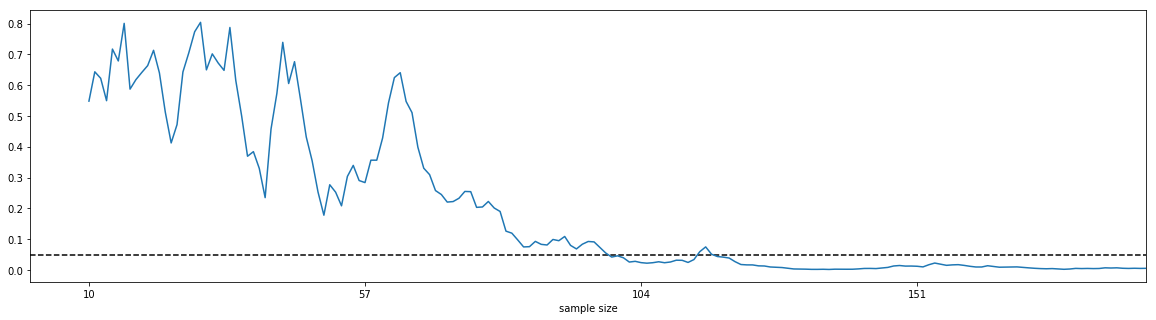

********************************************************************************
Lowest p-val 0.0019656212704385993
Lowest p-val at 46
n at which p-val goes below alpha(0.05) for the first time 8
number of times p-val went below alpha(0.05) 174


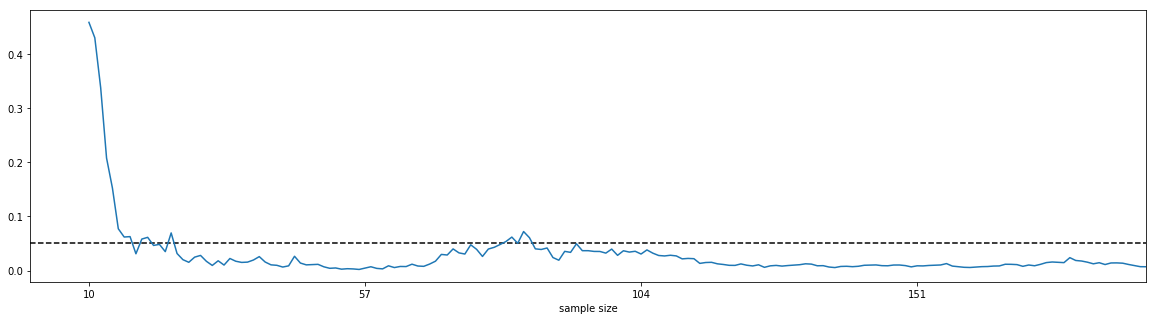

********************************************************************************
Lowest p-val 0.0352999044569678
Lowest p-val at 182
n at which p-val goes below alpha(0.05) for the first time 174
number of times p-val went below alpha(0.05) 5


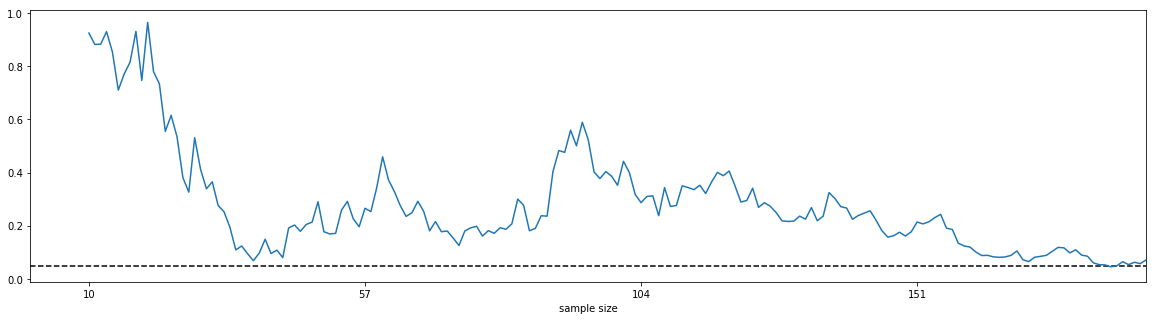

********************************************************************************
Lowest p-val 2.1515220523322174e-05
Lowest p-val at 176
n at which p-val goes below alpha(0.05) for the first time 86
number of times p-val went below alpha(0.05) 103


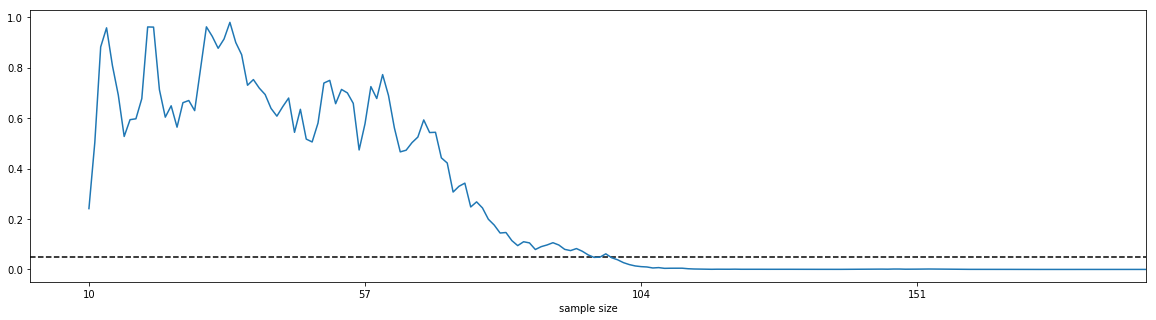

********************************************************************************
Lowest p-val 0.0004668876134187944
Lowest p-val at 189
n at which p-val goes below alpha(0.05) for the first time 101
number of times p-val went below alpha(0.05) 89


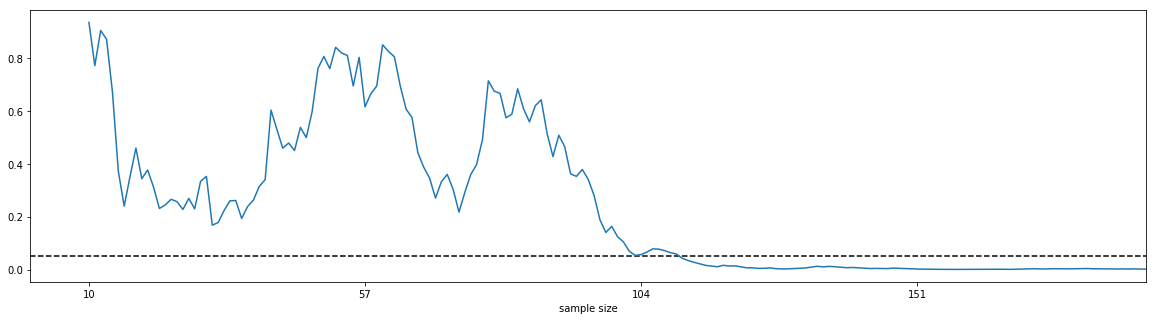

********************************************************************************
Lowest p-val 0.01906999689610138
Lowest p-val at 189
n at which p-val goes below alpha(0.05) for the first time 172
number of times p-val went below alpha(0.05) 8


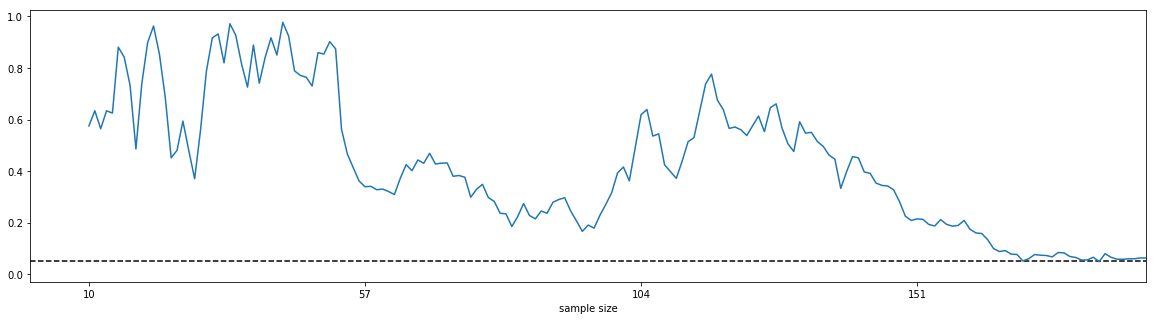

********************************************************************************
Lowest p-val 0.000127892742198731
Lowest p-val at 187
n at which p-val goes below alpha(0.05) for the first time 112
number of times p-val went below alpha(0.05) 78


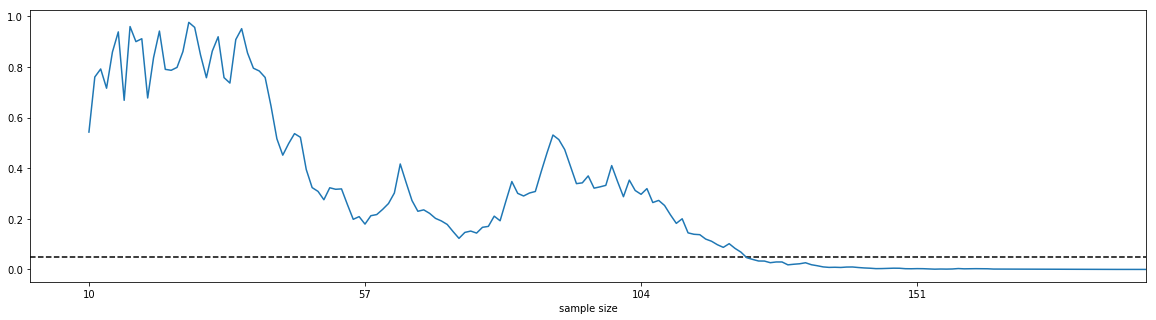

********************************************************************************
Lowest p-val 0.0007402704454842243
Lowest p-val at 170
n at which p-val goes below alpha(0.05) for the first time 27
number of times p-val went below alpha(0.05) 163


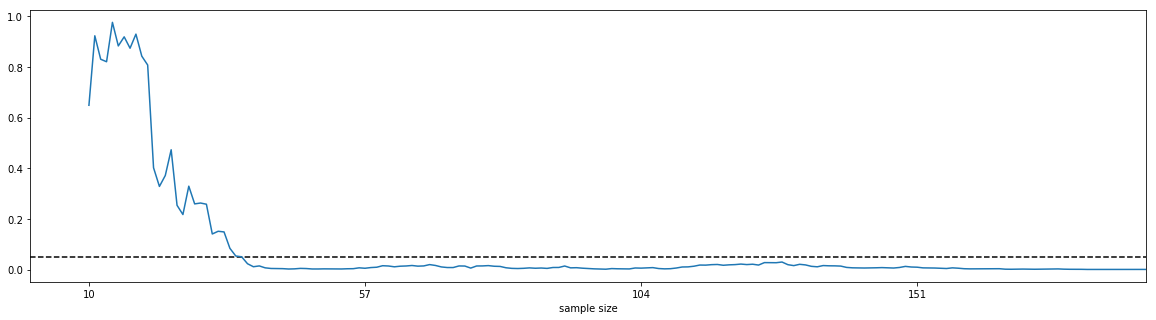

********************************************************************************
Lowest p-val 1.1444912602179975e-05
Lowest p-val at 189
n at which p-val goes below alpha(0.05) for the first time 6
number of times p-val went below alpha(0.05) 176


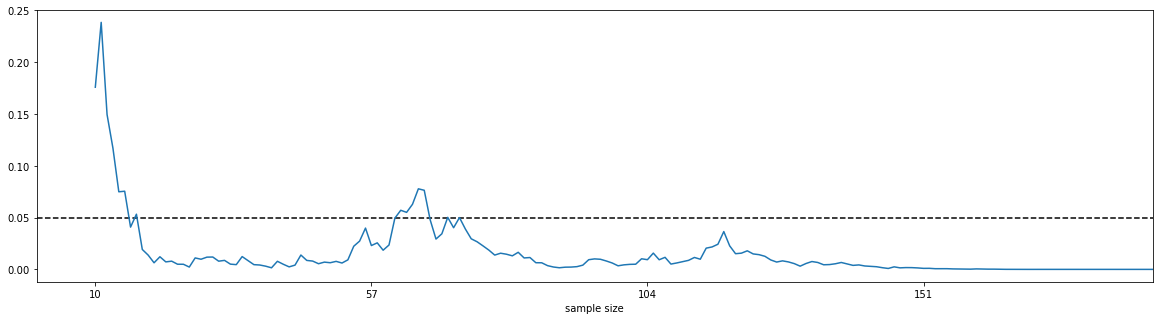

********************************************************************************


In [140]:
#Q2
count_2=0
for i in range(20):
    p_val, look_location = get_p_values_with_increasing_sample_size(effect_size=0.3, final_sample_size=200, print_detail=True)
    plot_p_val_with_increasing_sample_size(p_val, look_location)
    if p_val.min() < 0.05:
        count_2 +=1
    print("*"*80)
    

In [142]:
count_2

20

Lowest p-val 1.2028056412844396e-15
Lowest p-val at 153
n at which p-val goes below alpha(0.05) for the first time 1
number of times p-val went below alpha(0.05) 185


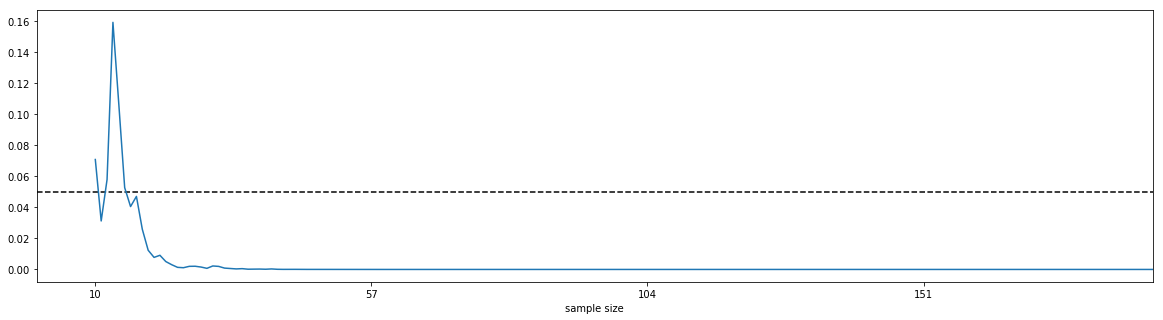

********************************************************************************
Lowest p-val 9.769084349057686e-14
Lowest p-val at 175
n at which p-val goes below alpha(0.05) for the first time 7
number of times p-val went below alpha(0.05) 183


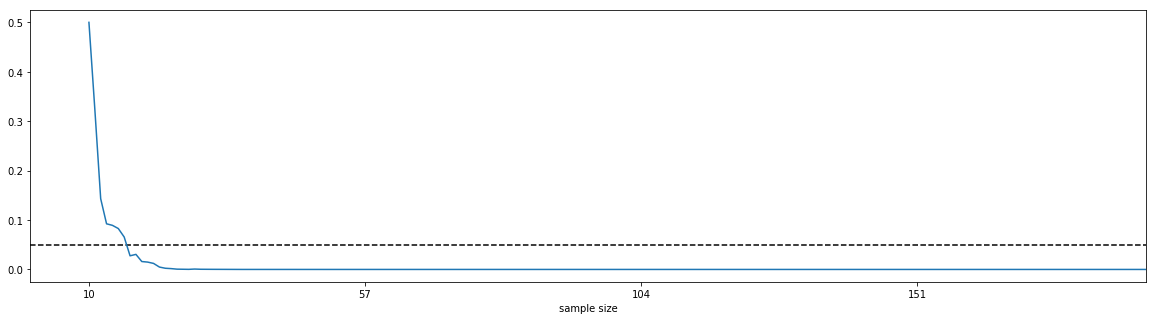

********************************************************************************
Lowest p-val 6.230326525308202e-14
Lowest p-val at 145
n at which p-val goes below alpha(0.05) for the first time 0
number of times p-val went below alpha(0.05) 190


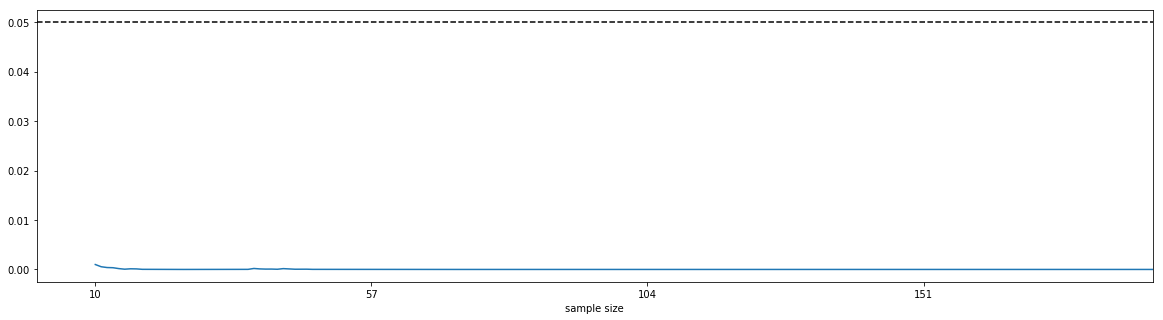

********************************************************************************
Lowest p-val 3.6135490974251333e-11
Lowest p-val at 170
n at which p-val goes below alpha(0.05) for the first time 0
number of times p-val went below alpha(0.05) 190


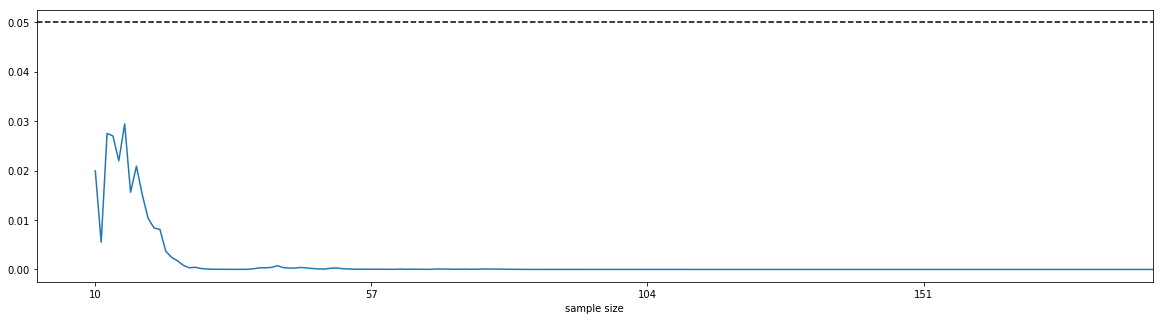

********************************************************************************
Lowest p-val 1.3412591529493825e-15
Lowest p-val at 187
n at which p-val goes below alpha(0.05) for the first time 0
number of times p-val went below alpha(0.05) 190


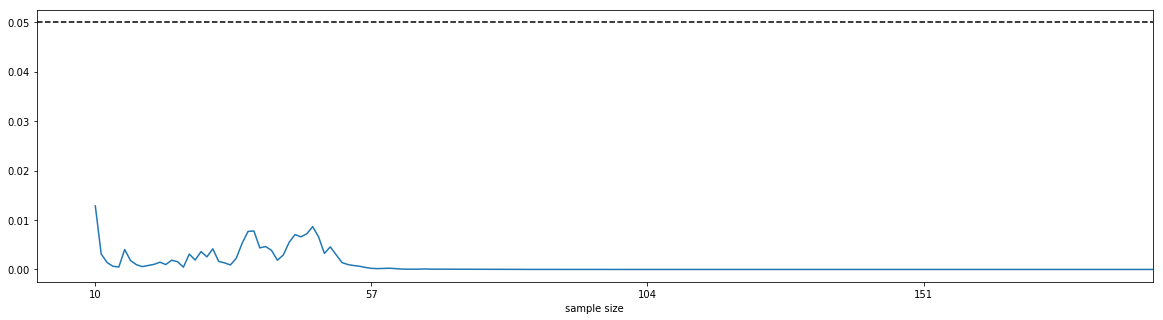

********************************************************************************
Lowest p-val 5.491738450601357e-08
Lowest p-val at 188
n at which p-val goes below alpha(0.05) for the first time 61
number of times p-val went below alpha(0.05) 129


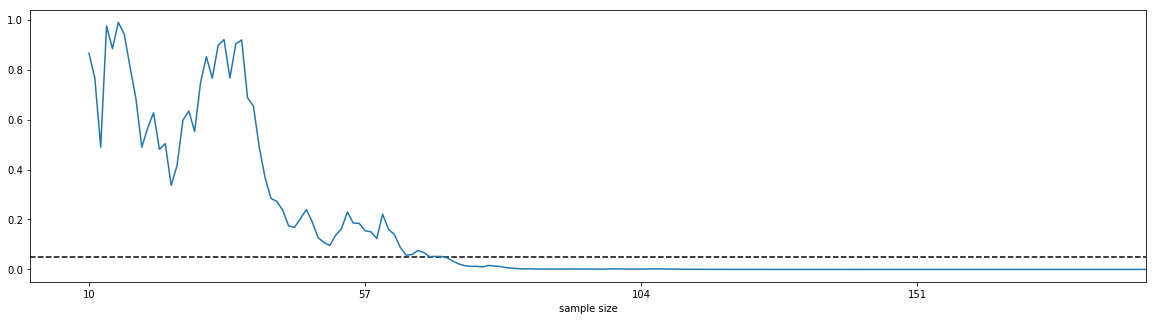

********************************************************************************
Lowest p-val 2.5839699677071885e-14
Lowest p-val at 188
n at which p-val goes below alpha(0.05) for the first time 24
number of times p-val went below alpha(0.05) 164


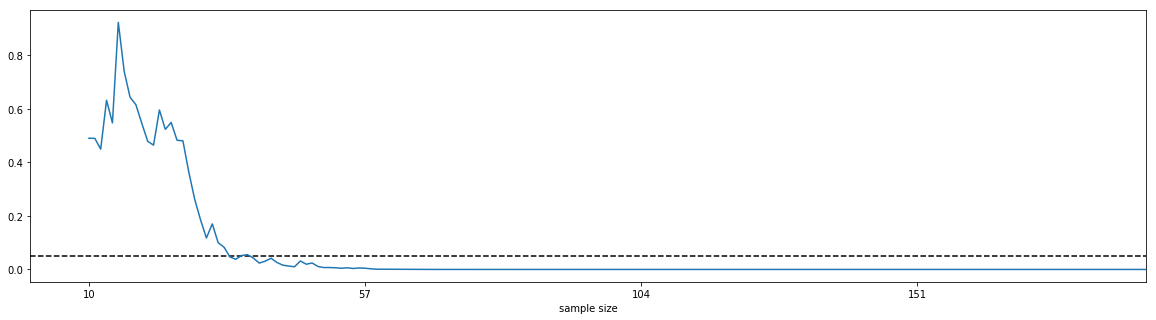

********************************************************************************
Lowest p-val 2.1745211196810818e-14
Lowest p-val at 189
n at which p-val goes below alpha(0.05) for the first time 3
number of times p-val went below alpha(0.05) 181


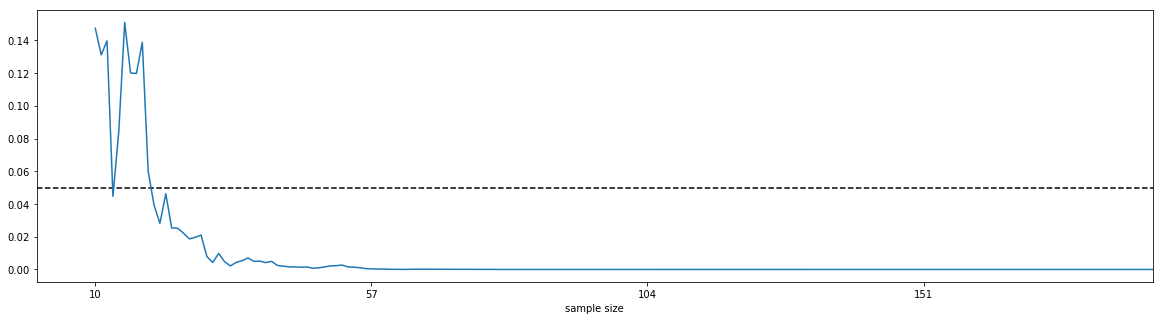

********************************************************************************
Lowest p-val 4.5222626711699075e-17
Lowest p-val at 186
n at which p-val goes below alpha(0.05) for the first time 9
number of times p-val went below alpha(0.05) 181


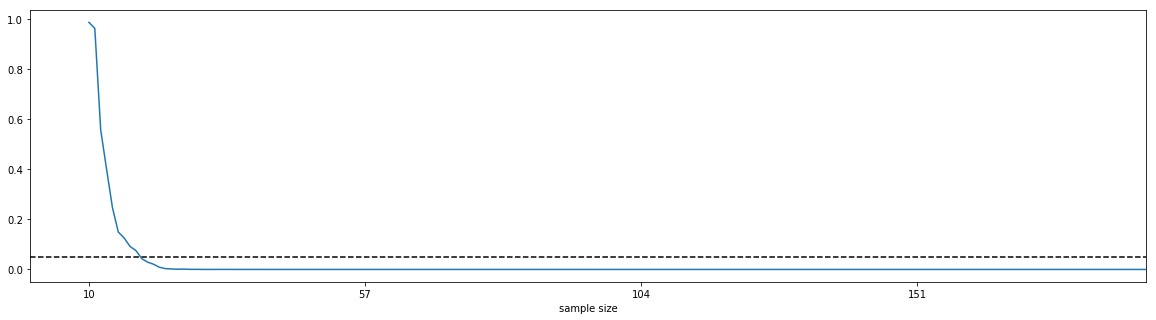

********************************************************************************
Lowest p-val 1.5254115863341286e-15
Lowest p-val at 188
n at which p-val goes below alpha(0.05) for the first time 1
number of times p-val went below alpha(0.05) 189


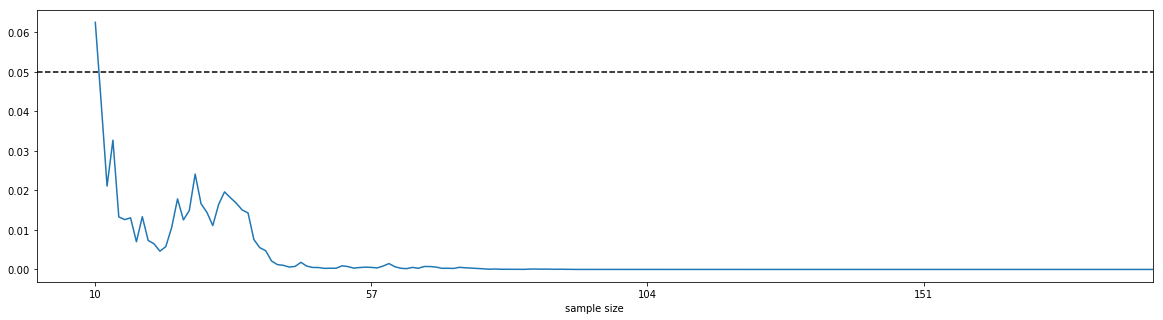

********************************************************************************
Lowest p-val 3.9272321458673614e-11
Lowest p-val at 186
n at which p-val goes below alpha(0.05) for the first time 19
number of times p-val went below alpha(0.05) 171


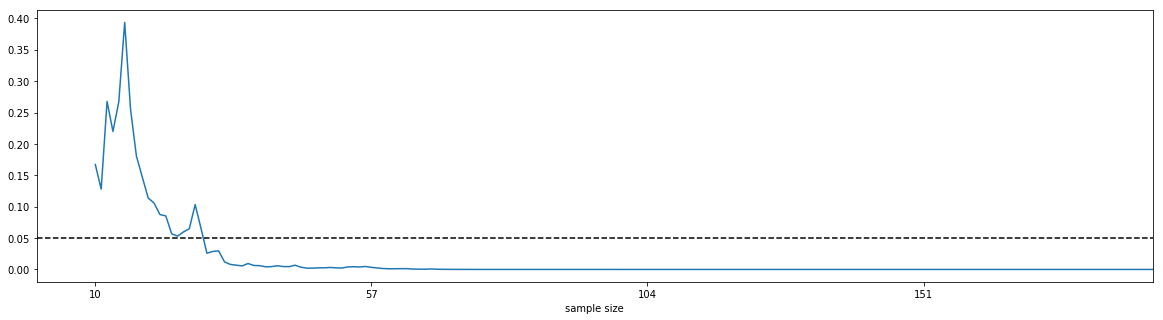

********************************************************************************
Lowest p-val 9.242010645857115e-16
Lowest p-val at 186
n at which p-val goes below alpha(0.05) for the first time 0
number of times p-val went below alpha(0.05) 179


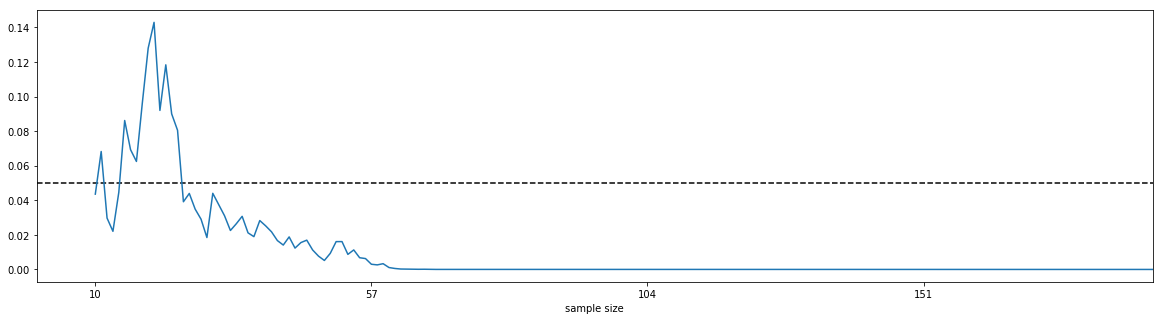

********************************************************************************
Lowest p-val 1.9350649932543821e-16
Lowest p-val at 183
n at which p-val goes below alpha(0.05) for the first time 6
number of times p-val went below alpha(0.05) 184


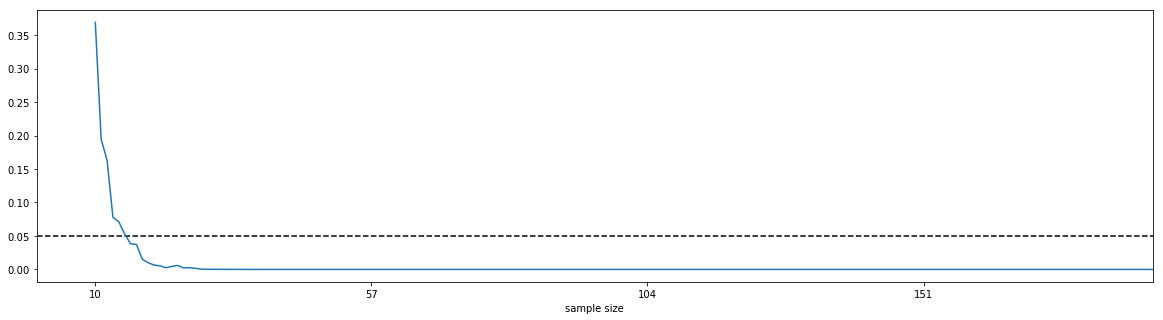

********************************************************************************
Lowest p-val 3.5777095913005485e-19
Lowest p-val at 165
n at which p-val goes below alpha(0.05) for the first time 0
number of times p-val went below alpha(0.05) 190


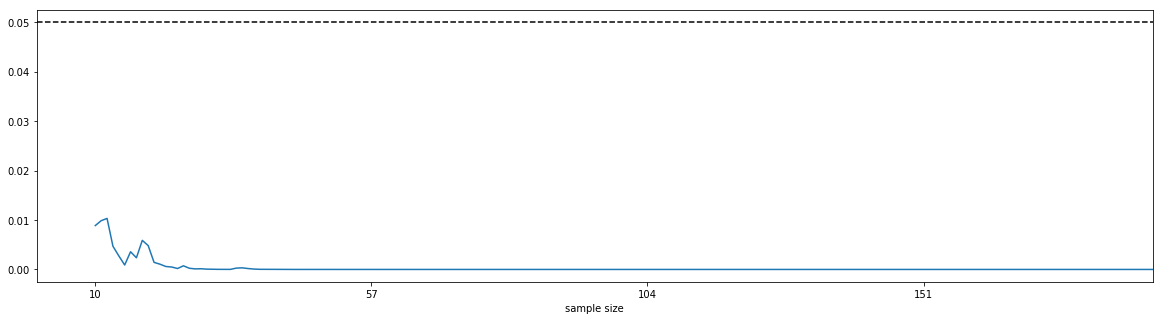

********************************************************************************
Lowest p-val 2.0873773830925596e-13
Lowest p-val at 181
n at which p-val goes below alpha(0.05) for the first time 0
number of times p-val went below alpha(0.05) 190


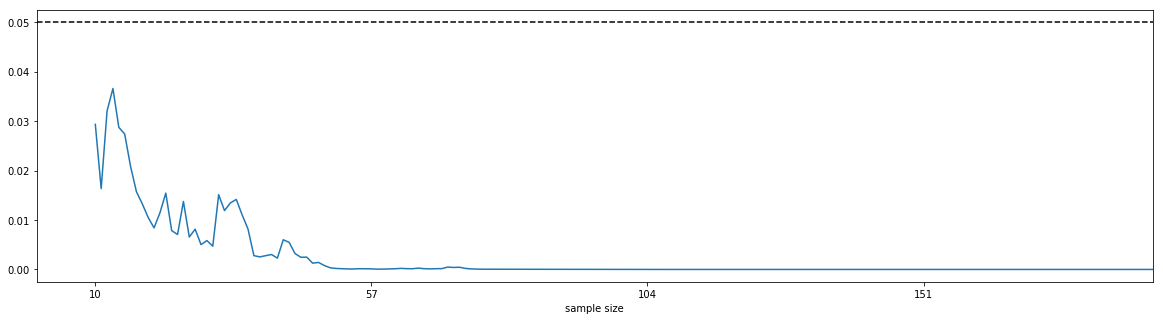

********************************************************************************
Lowest p-val 2.6069729256804955e-17
Lowest p-val at 189
n at which p-val goes below alpha(0.05) for the first time 3
number of times p-val went below alpha(0.05) 187


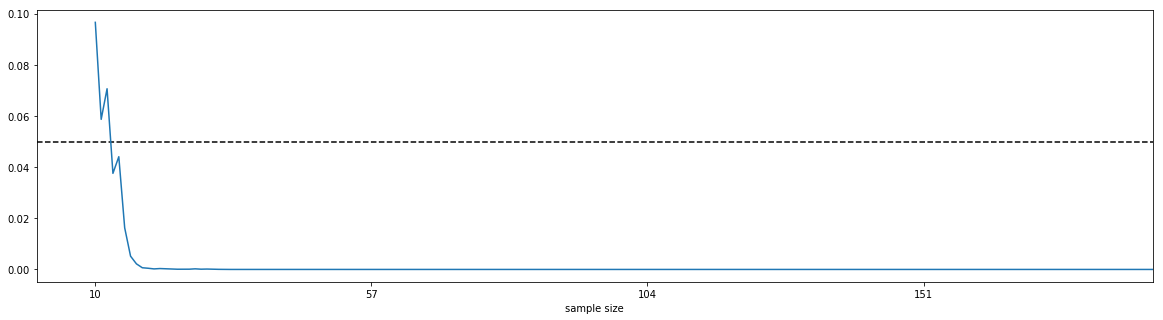

********************************************************************************
Lowest p-val 2.8810417693323385e-10
Lowest p-val at 188
n at which p-val goes below alpha(0.05) for the first time 7
number of times p-val went below alpha(0.05) 179


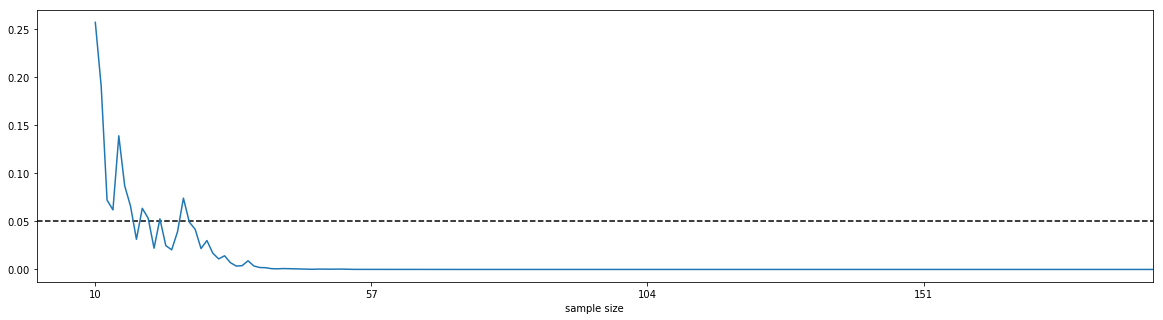

********************************************************************************
Lowest p-val 2.2393912094935847e-13
Lowest p-val at 189
n at which p-val goes below alpha(0.05) for the first time 0
number of times p-val went below alpha(0.05) 189


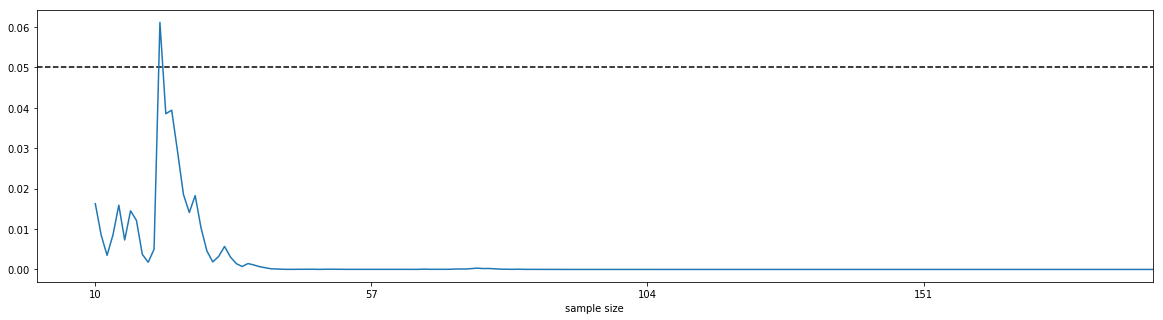

********************************************************************************
Lowest p-val 1.4474308744452316e-17
Lowest p-val at 188
n at which p-val goes below alpha(0.05) for the first time 34
number of times p-val went below alpha(0.05) 154


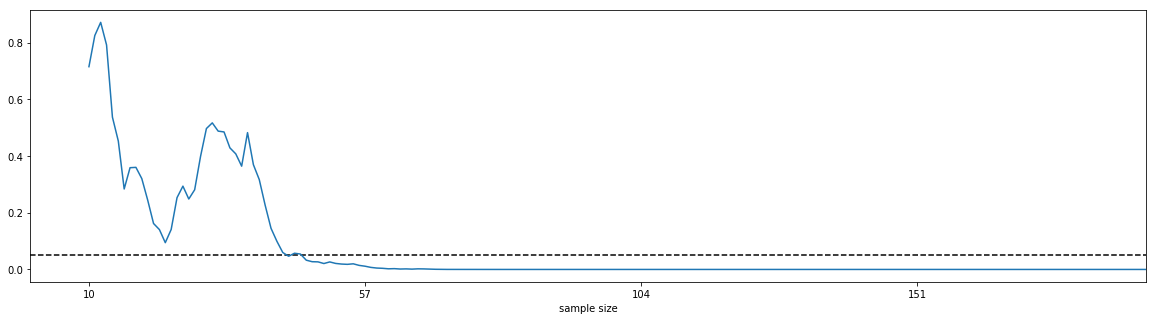

********************************************************************************
Lowest p-val 4.455959658569892e-11
Lowest p-val at 188
n at which p-val goes below alpha(0.05) for the first time 1
number of times p-val went below alpha(0.05) 148


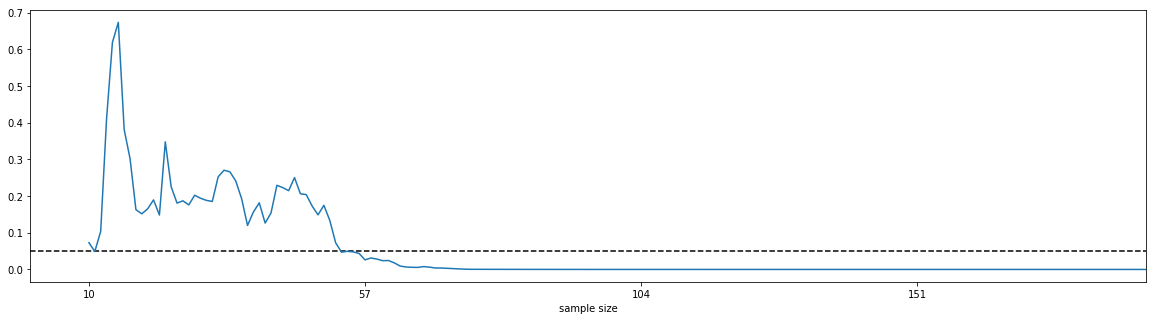

********************************************************************************


In [143]:
#Q3
count_3=0
for i in range(20):
    p_val, look_location = get_p_values_with_increasing_sample_size(effect_size=0.8, final_sample_size=200, print_detail=True)
    plot_p_val_with_increasing_sample_size(p_val, look_location)
    if p_val.min() < 0.05:
        count_3 +=1
    print("*"*80)
    

In [92]:
count_3

20

Lowest p-val 2.924106303247125e-18
Lowest p-val at 1998
n at which p-val goes below alpha(0.05) for the first time 151
number of times p-val went below alpha(0.05) 1848


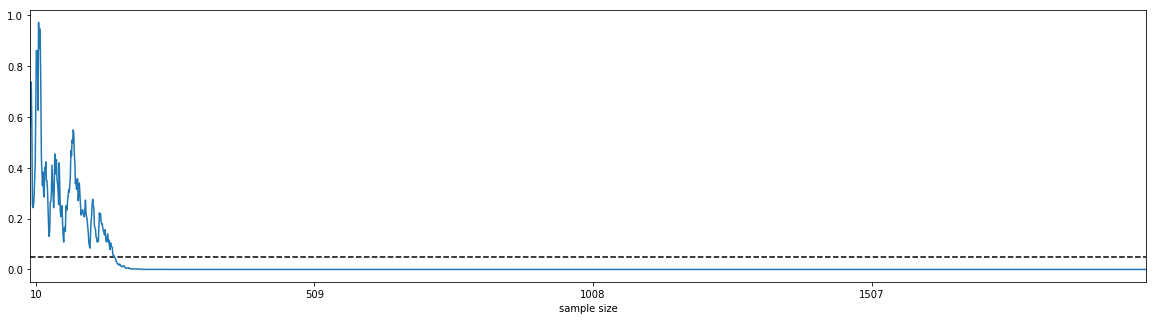

********************************************************************************
Lowest p-val 4.112629052127796e-29
Lowest p-val at 1979
n at which p-val goes below alpha(0.05) for the first time 81
number of times p-val went below alpha(0.05) 1918


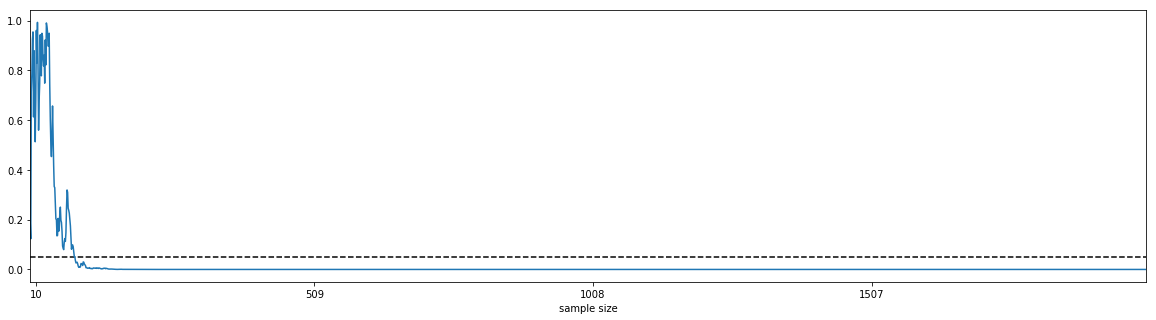

********************************************************************************
Lowest p-val 4.772216541688716e-21
Lowest p-val at 1262
n at which p-val goes below alpha(0.05) for the first time 30
number of times p-val went below alpha(0.05) 1925


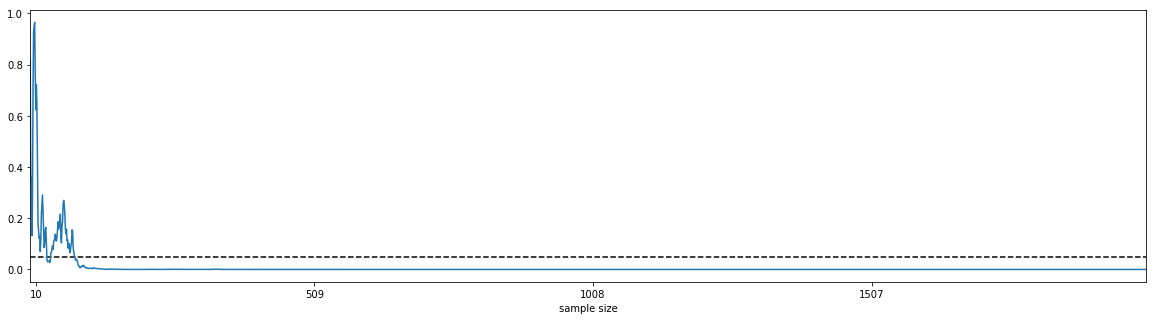

********************************************************************************
Lowest p-val 4.762594301270389e-16
Lowest p-val at 1884
n at which p-val goes below alpha(0.05) for the first time 76
number of times p-val went below alpha(0.05) 1918


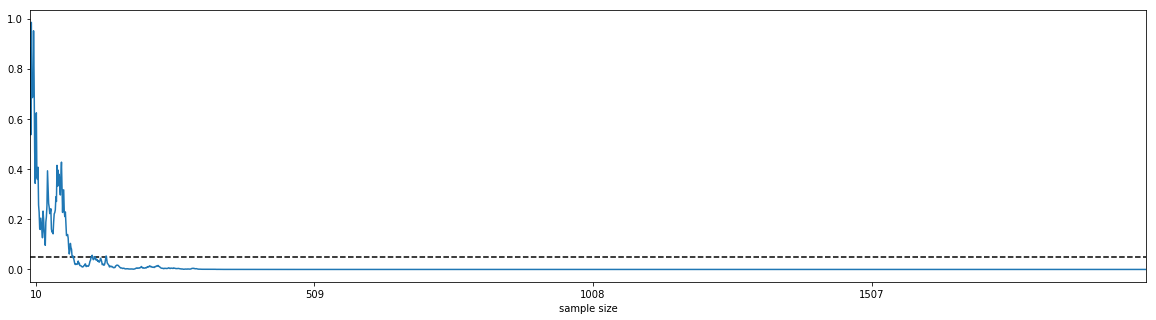

********************************************************************************
Lowest p-val 1.4884333072155994e-20
Lowest p-val at 1988
n at which p-val goes below alpha(0.05) for the first time 8
number of times p-val went below alpha(0.05) 1945


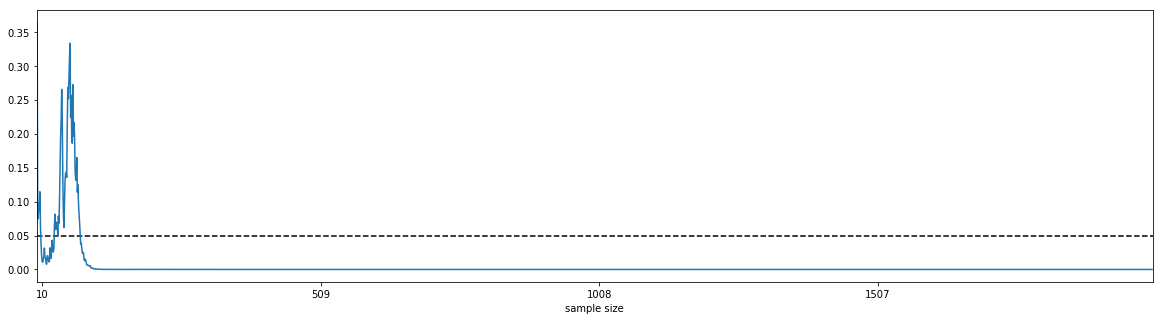

********************************************************************************
Lowest p-val 4.050383503918341e-24
Lowest p-val at 1992
n at which p-val goes below alpha(0.05) for the first time 6
number of times p-val went below alpha(0.05) 1970


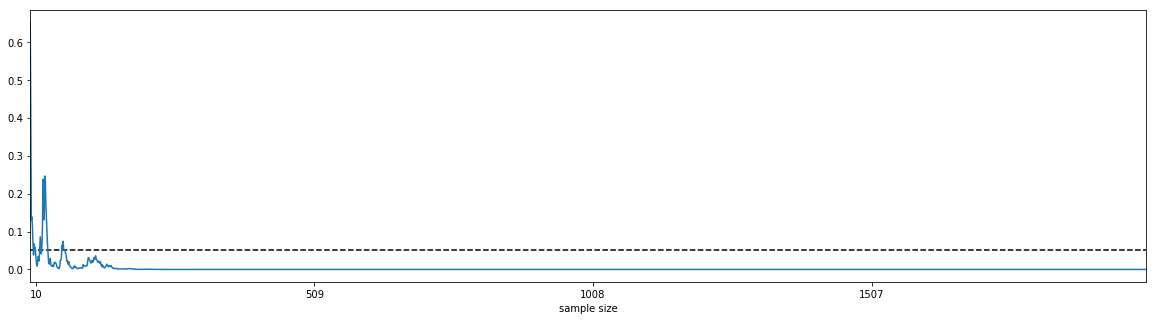

********************************************************************************
Lowest p-val 5.3446511736085735e-24
Lowest p-val at 1867
n at which p-val goes below alpha(0.05) for the first time 16
number of times p-val went below alpha(0.05) 1975


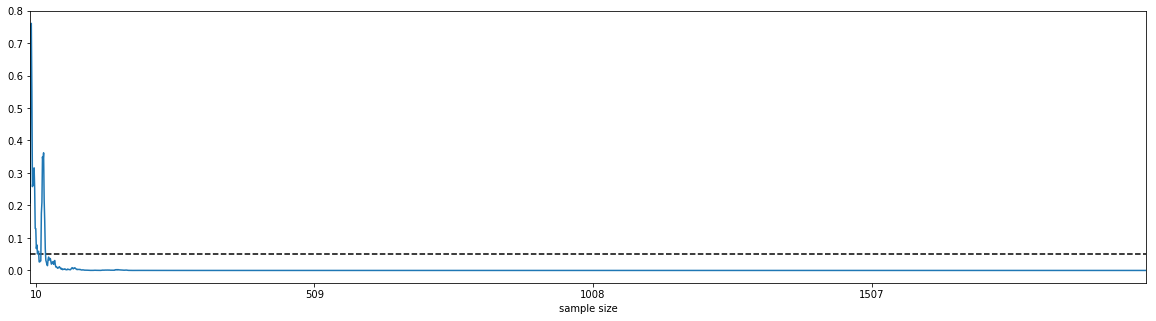

********************************************************************************
Lowest p-val 7.5453329253402665e-22
Lowest p-val at 1998
n at which p-val goes below alpha(0.05) for the first time 15
number of times p-val went below alpha(0.05) 1984


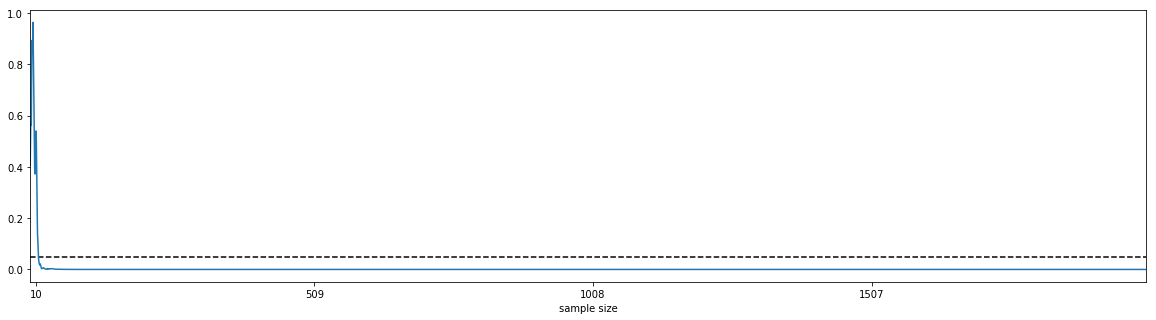

********************************************************************************
Lowest p-val 1.3886894044487037e-19
Lowest p-val at 1938
n at which p-val goes below alpha(0.05) for the first time 16
number of times p-val went below alpha(0.05) 1975


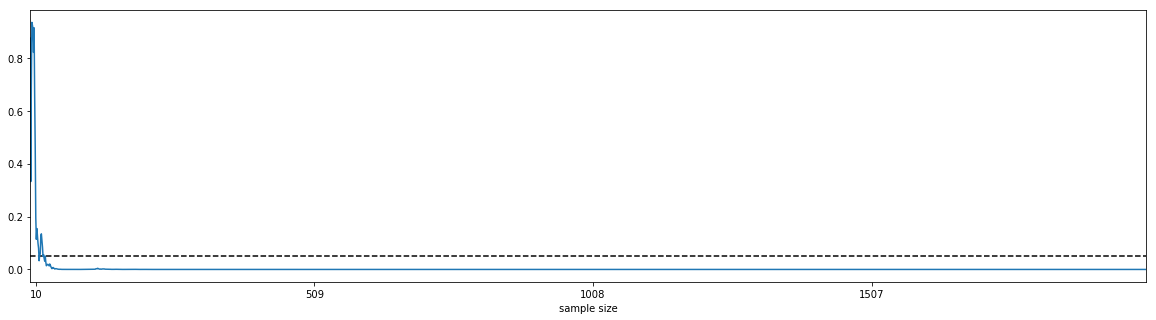

********************************************************************************
Lowest p-val 2.976944581669832e-27
Lowest p-val at 1998
n at which p-val goes below alpha(0.05) for the first time 2
number of times p-val went below alpha(0.05) 1984


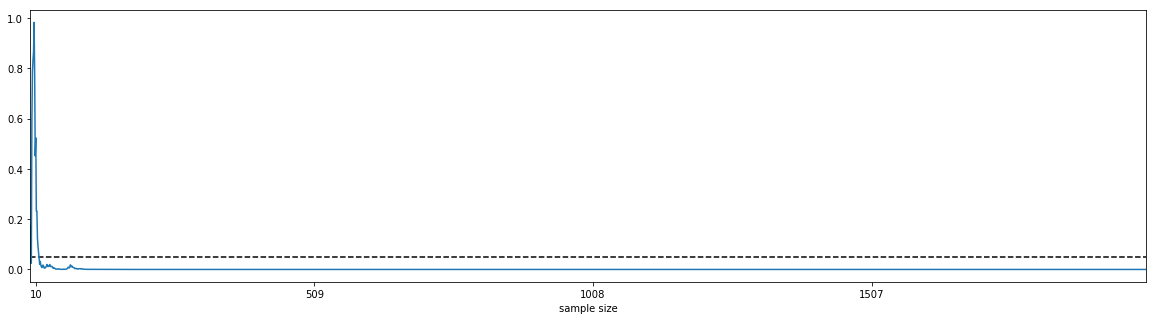

********************************************************************************
Lowest p-val 3.325505124841346e-14
Lowest p-val at 1669
n at which p-val goes below alpha(0.05) for the first time 248
number of times p-val went below alpha(0.05) 1750


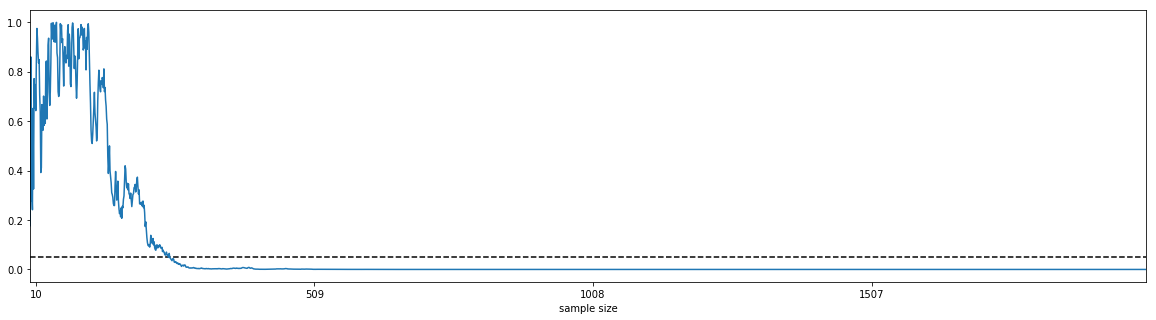

********************************************************************************
Lowest p-val 5.803818855686012e-27
Lowest p-val at 1981
n at which p-val goes below alpha(0.05) for the first time 90
number of times p-val went below alpha(0.05) 1899


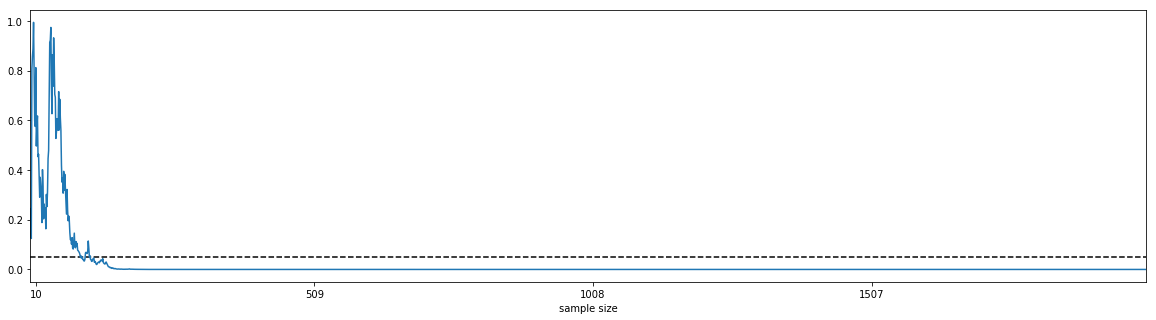

********************************************************************************
Lowest p-val 1.1233164603429935e-20
Lowest p-val at 1997
n at which p-val goes below alpha(0.05) for the first time 7
number of times p-val went below alpha(0.05) 1933


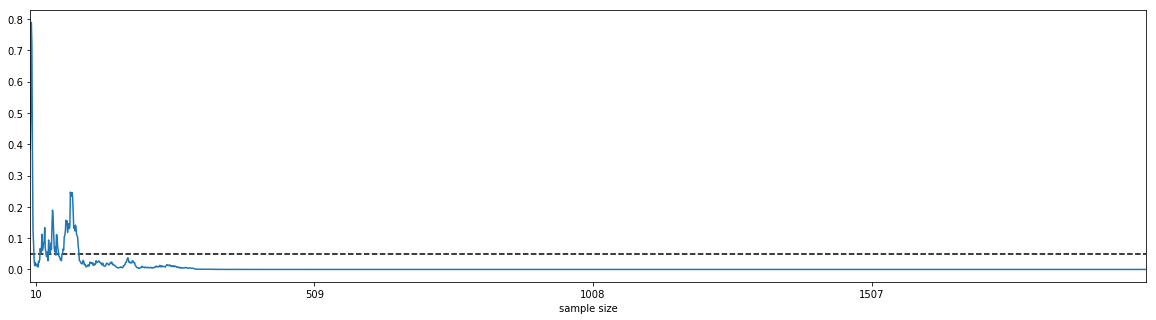

********************************************************************************
Lowest p-val 5.835635992208832e-21
Lowest p-val at 1987
n at which p-val goes below alpha(0.05) for the first time 187
number of times p-val went below alpha(0.05) 1756


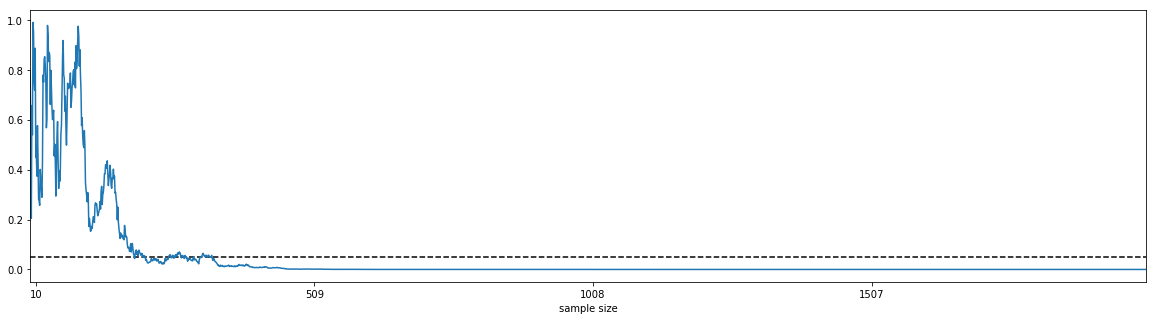

********************************************************************************
Lowest p-val 6.3503166740330525e-24
Lowest p-val at 1874
n at which p-val goes below alpha(0.05) for the first time 41
number of times p-val went below alpha(0.05) 1957


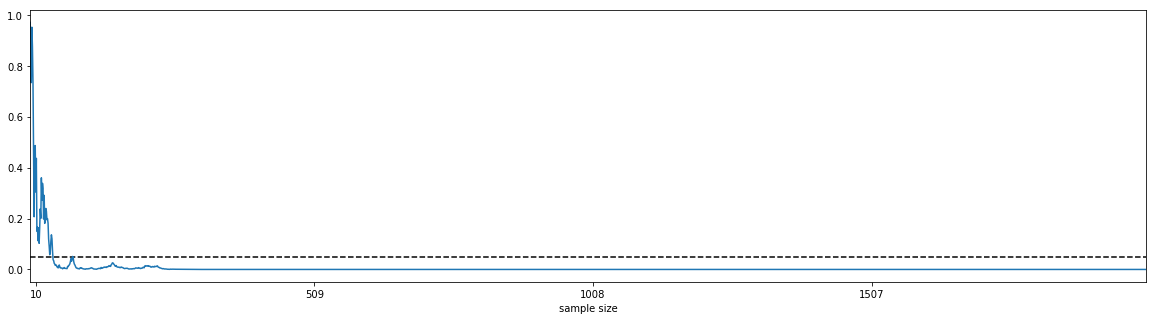

********************************************************************************
Lowest p-val 6.554767134647725e-23
Lowest p-val at 1992
n at which p-val goes below alpha(0.05) for the first time 54
number of times p-val went below alpha(0.05) 1945


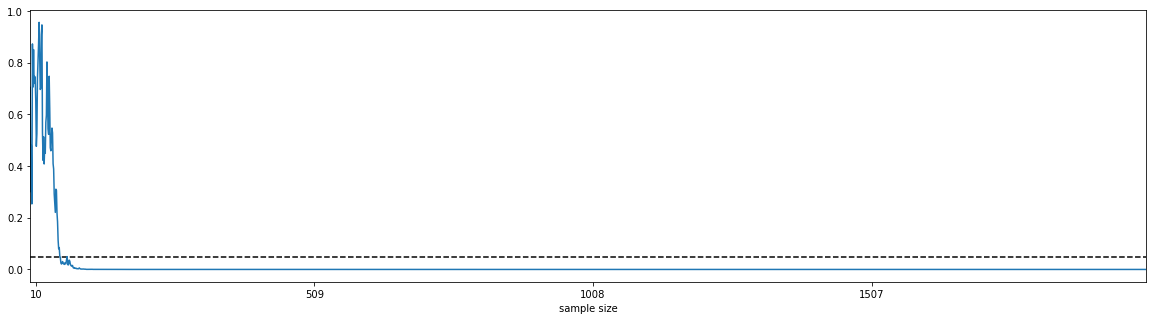

********************************************************************************
Lowest p-val 2.2738516175430857e-31
Lowest p-val at 1984
n at which p-val goes below alpha(0.05) for the first time 11
number of times p-val went below alpha(0.05) 1988


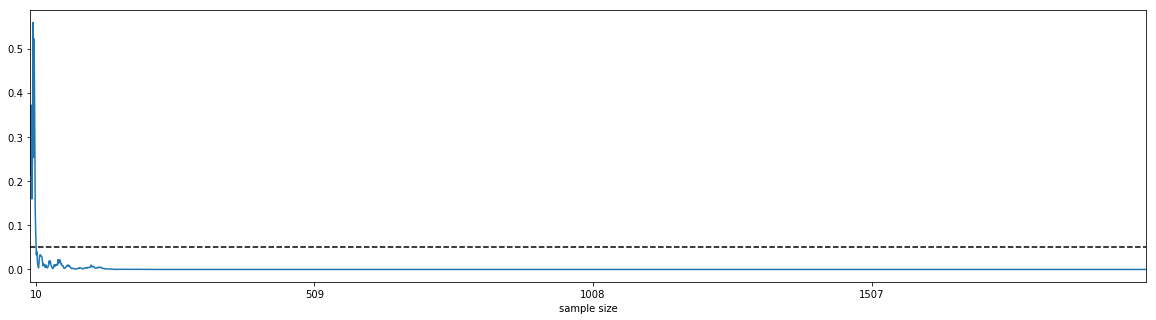

********************************************************************************
Lowest p-val 7.293259130089344e-19
Lowest p-val at 1730
n at which p-val goes below alpha(0.05) for the first time 65
number of times p-val went below alpha(0.05) 1849


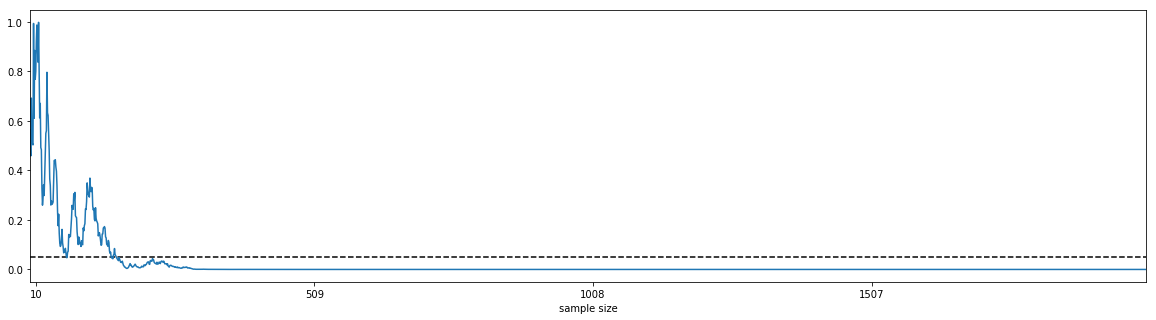

********************************************************************************
Lowest p-val 1.0119441316621491e-19
Lowest p-val at 1998
n at which p-val goes below alpha(0.05) for the first time 23
number of times p-val went below alpha(0.05) 1963


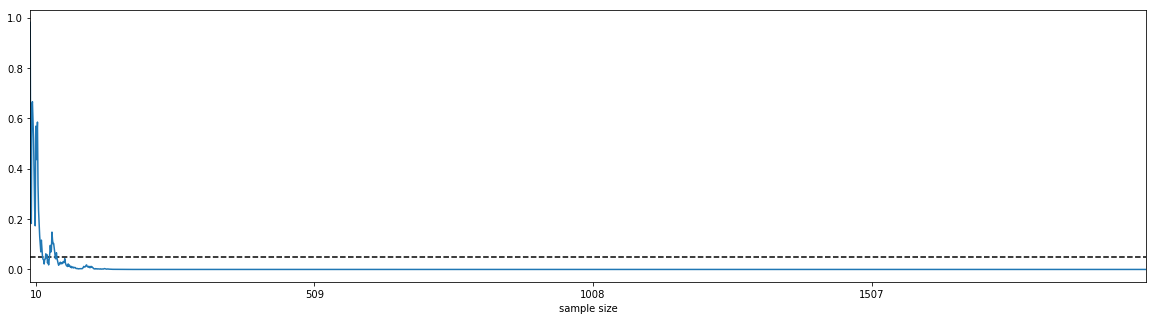

********************************************************************************
Lowest p-val 2.508663386331555e-16
Lowest p-val at 1998
n at which p-val goes below alpha(0.05) for the first time 37
number of times p-val went below alpha(0.05) 1961


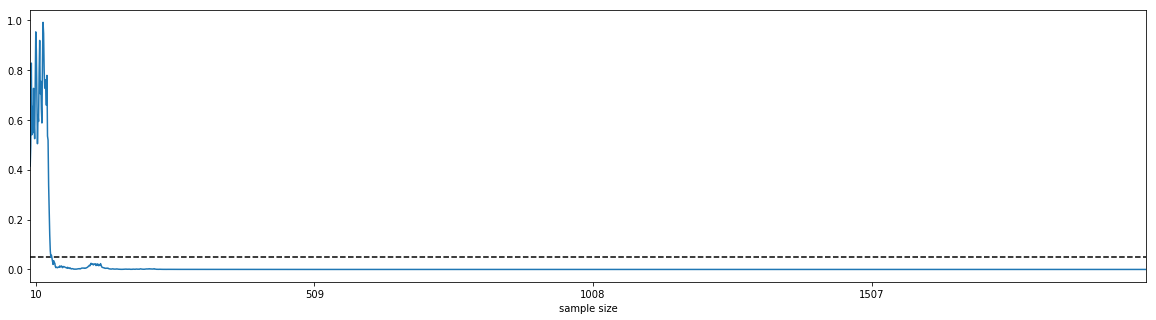

********************************************************************************


In [95]:
#Q3
count_4=0
for i in range(20):
    p_val = get_p_values_with_increasing_sample_size(effect_size=0.3, final_sample_size=2000, print_detail=True)
    plot_p_val_with_increasing_sample_size(p_val)
    if p_val.min() < 0.05:
        count_4 +=1
    print("*"*80)
    

In [94]:
count_3

20

Lowest p-val 0.05388746126756079
Lowest p-val at 1
p-val never went below alpha(0.05) in this simulation


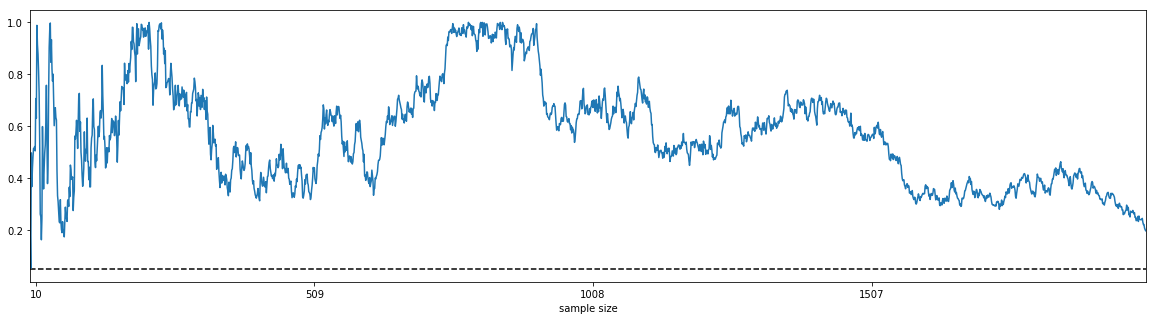

********************************************************************************
Lowest p-val 0.025491855503735082
Lowest p-val at 164
n at which p-val goes below alpha(0.05) for the first time 8
number of times p-val went below alpha(0.05) 23


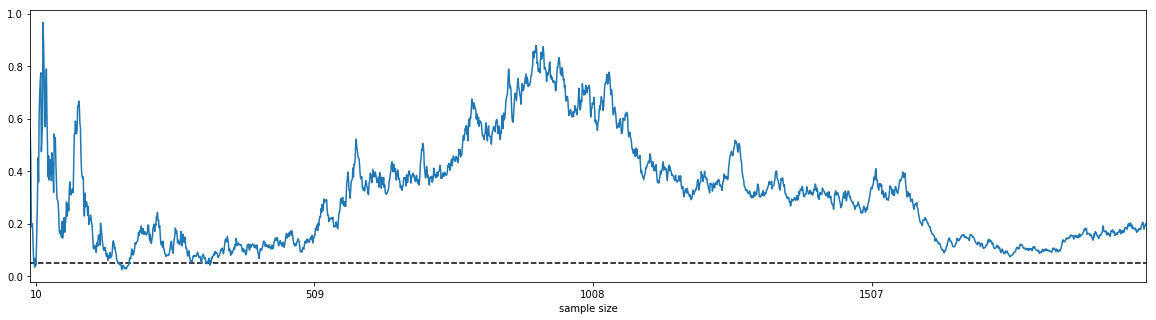

********************************************************************************
Lowest p-val 0.14159050898552408
Lowest p-val at 1884
p-val never went below alpha(0.05) in this simulation


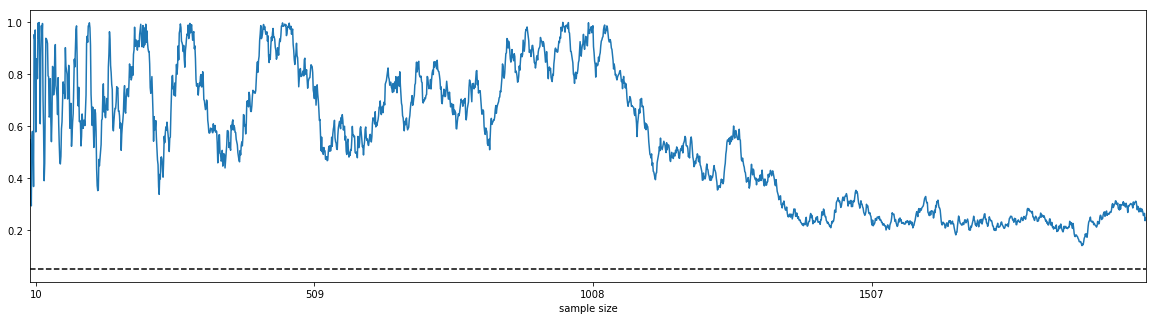

********************************************************************************
Lowest p-val 0.05846741113154814
Lowest p-val at 16
p-val never went below alpha(0.05) in this simulation


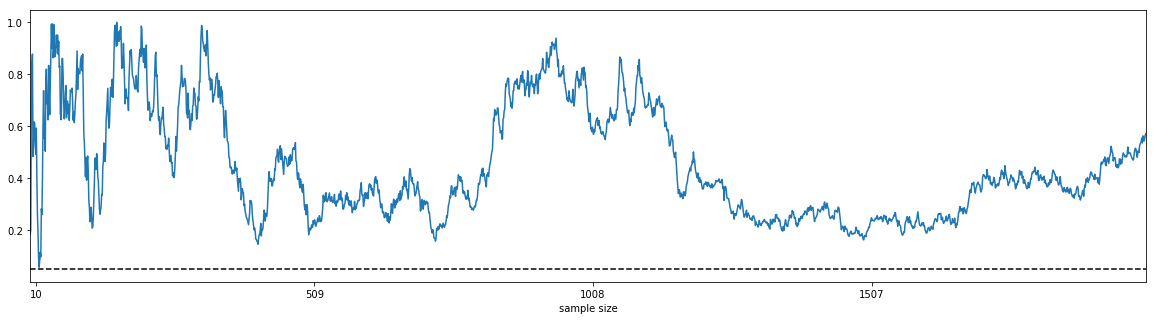

********************************************************************************
Lowest p-val 0.00852956020239038
Lowest p-val at 7
n at which p-val goes below alpha(0.05) for the first time 4
number of times p-val went below alpha(0.05) 6


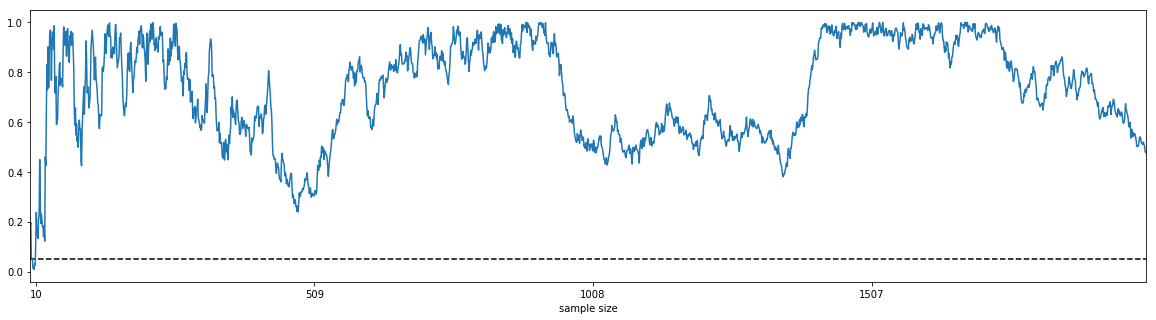

********************************************************************************
Lowest p-val 0.019291499136365468
Lowest p-val at 1901
n at which p-val goes below alpha(0.05) for the first time 462
number of times p-val went below alpha(0.05) 202


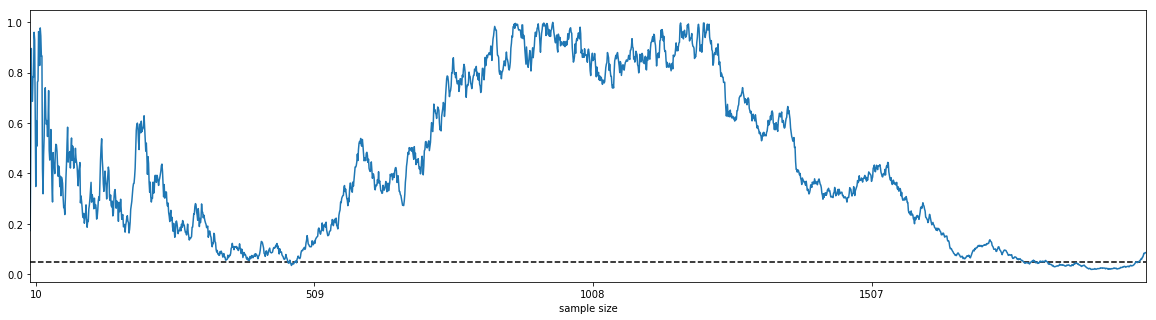

********************************************************************************
Lowest p-val 0.10824696420336812
Lowest p-val at 1692
p-val never went below alpha(0.05) in this simulation


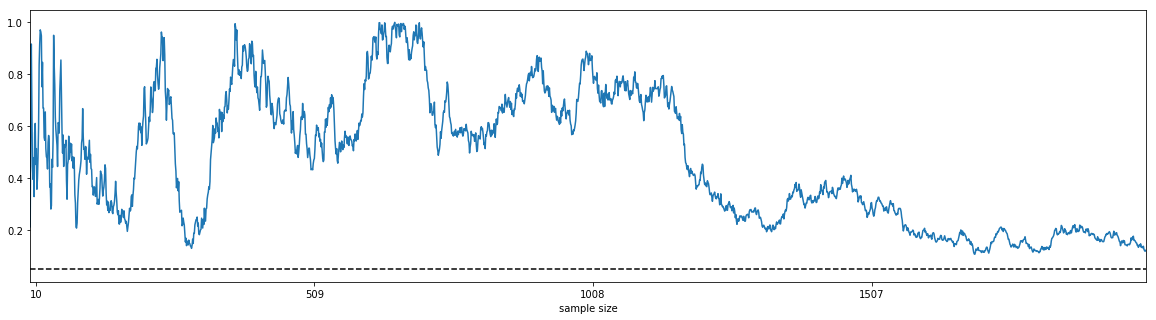

********************************************************************************
Lowest p-val 0.04019155798431295
Lowest p-val at 3
n at which p-val goes below alpha(0.05) for the first time 3
number of times p-val went below alpha(0.05) 1


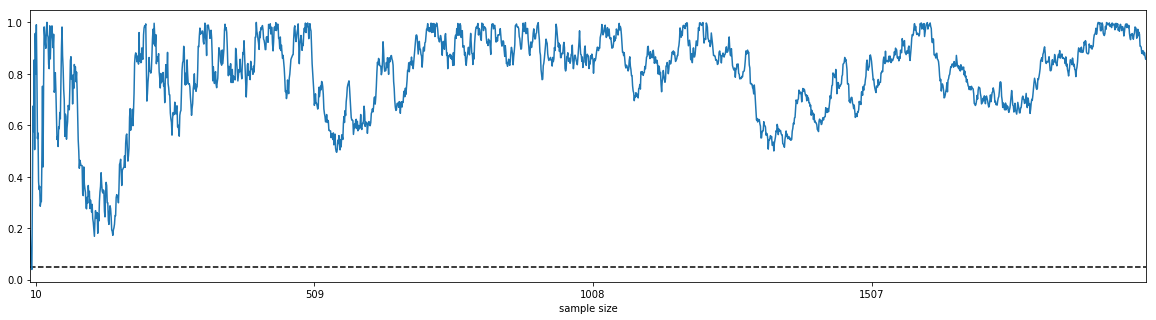

********************************************************************************
Lowest p-val 0.10257271522977508
Lowest p-val at 1936
p-val never went below alpha(0.05) in this simulation


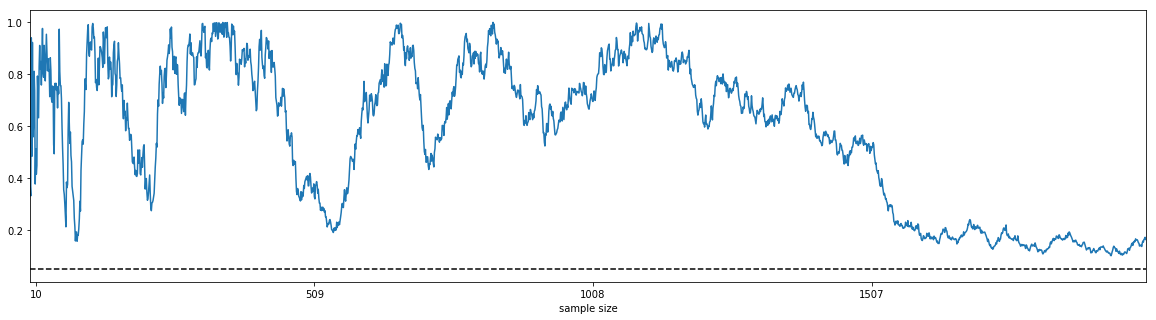

********************************************************************************
Lowest p-val 0.19701054669477636
Lowest p-val at 240
p-val never went below alpha(0.05) in this simulation


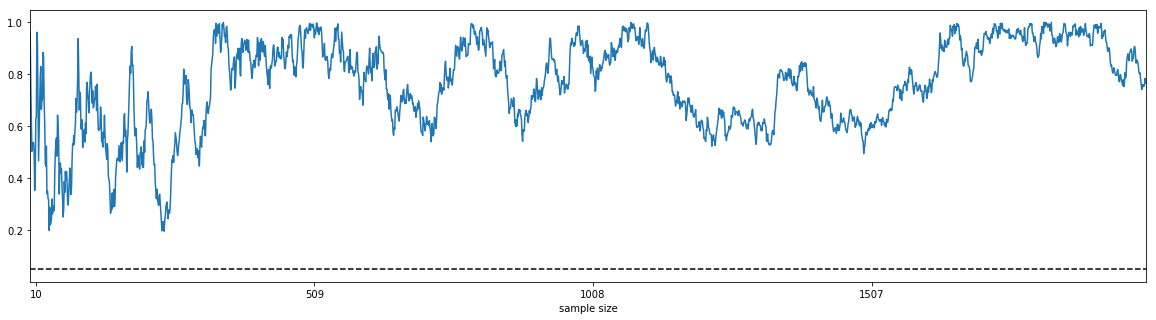

********************************************************************************
Lowest p-val 0.09059892674853483
Lowest p-val at 1396
p-val never went below alpha(0.05) in this simulation


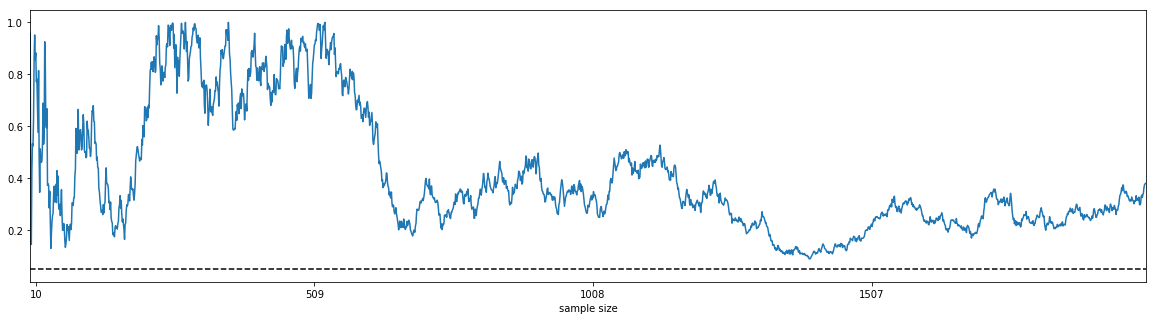

********************************************************************************
Lowest p-val 0.09854646007242793
Lowest p-val at 260
p-val never went below alpha(0.05) in this simulation


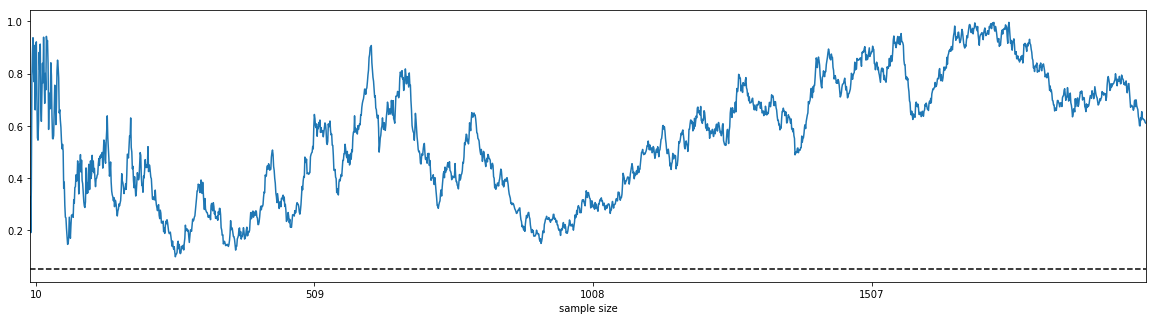

********************************************************************************
Lowest p-val 0.01598420967447719
Lowest p-val at 1371
n at which p-val goes below alpha(0.05) for the first time 1070
number of times p-val went below alpha(0.05) 576


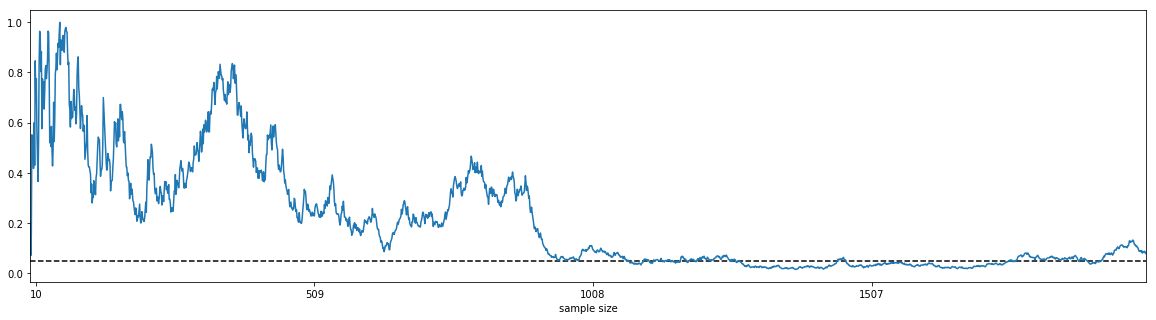

********************************************************************************
Lowest p-val 0.019997318469511912
Lowest p-val at 236
n at which p-val goes below alpha(0.05) for the first time 27
number of times p-val went below alpha(0.05) 88


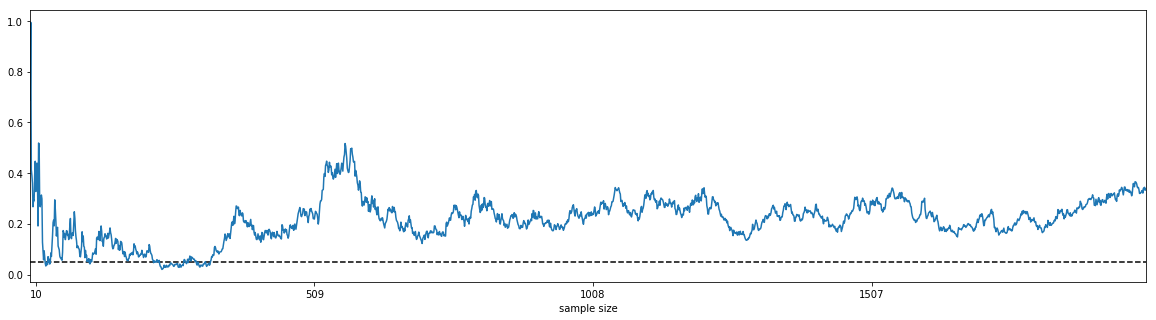

********************************************************************************
Lowest p-val 0.0013551184741330098
Lowest p-val at 206
n at which p-val goes below alpha(0.05) for the first time 38
number of times p-val went below alpha(0.05) 531


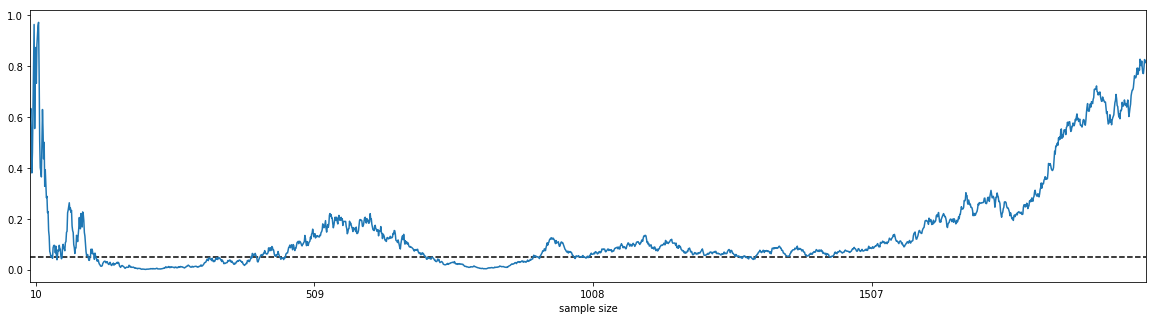

********************************************************************************
Lowest p-val 0.008388689323628639
Lowest p-val at 397
n at which p-val goes below alpha(0.05) for the first time 5
number of times p-val went below alpha(0.05) 328


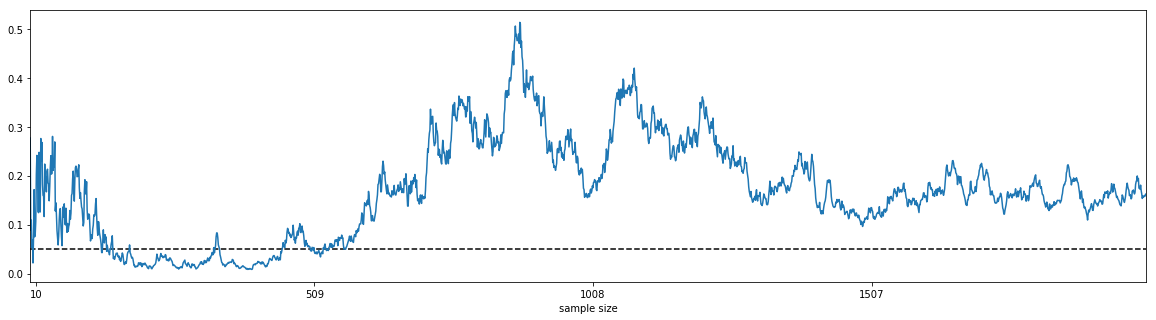

********************************************************************************
Lowest p-val 0.037766875303165054
Lowest p-val at 25
n at which p-val goes below alpha(0.05) for the first time 23
number of times p-val went below alpha(0.05) 5


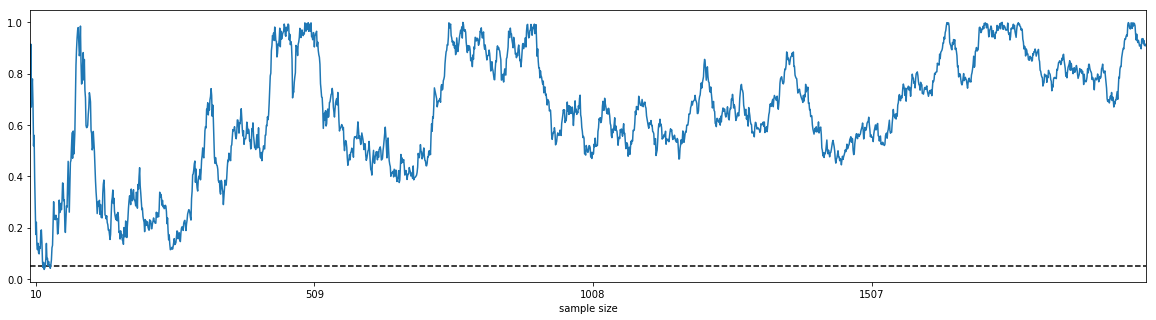

********************************************************************************
Lowest p-val 0.08552481004148552
Lowest p-val at 418
p-val never went below alpha(0.05) in this simulation


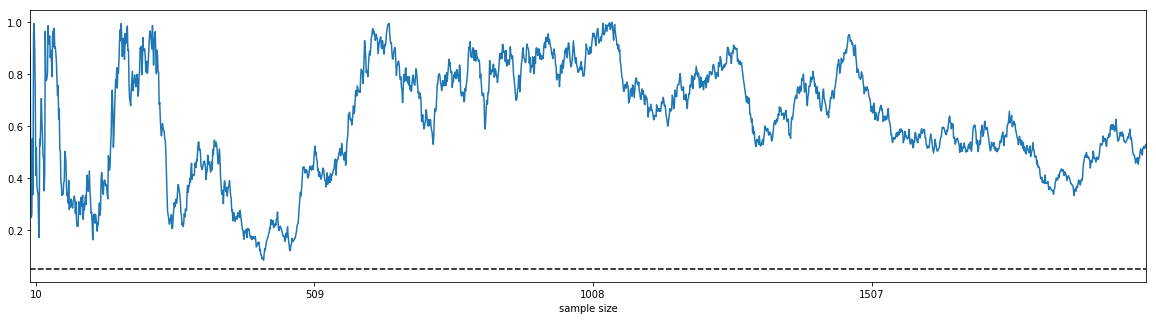

********************************************************************************
Lowest p-val 0.15211627859993282
Lowest p-val at 624
p-val never went below alpha(0.05) in this simulation


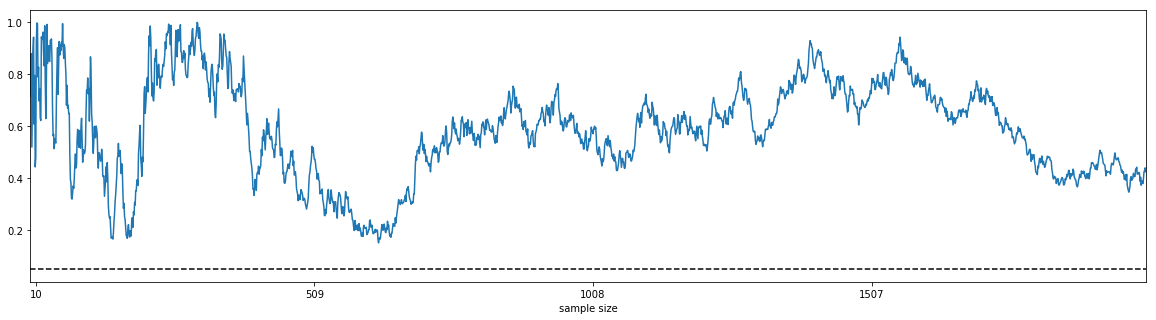

********************************************************************************
Lowest p-val 0.045040790621275424
Lowest p-val at 28
n at which p-val goes below alpha(0.05) for the first time 28
number of times p-val went below alpha(0.05) 2


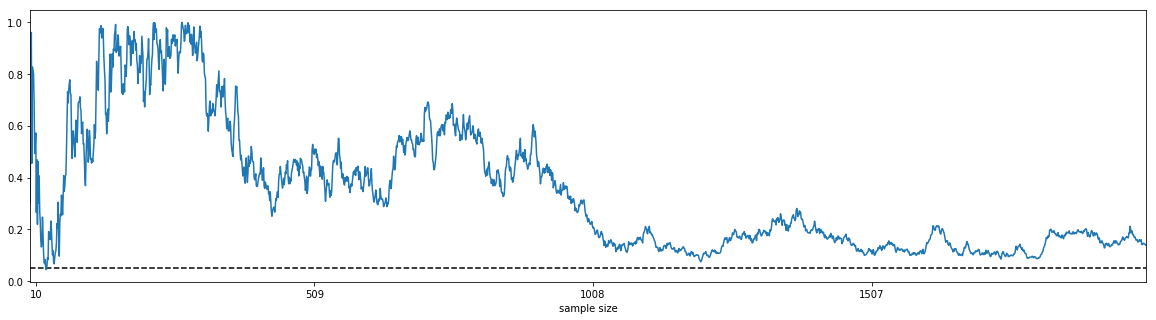

********************************************************************************


In [97]:
#Q3
count_5=0
for i in range(20):
    p_val = get_p_values_with_increasing_sample_size(effect_size=0, final_sample_size=2000, print_detail=True)
    plot_p_val_with_increasing_sample_size(p_val)
    if p_val.min() < 0.05:
        count_5 +=1
    print("*"*80)
    

Simulating inflation in Type 1 error rate with optional stopping and multiple look at the experiment
    - Performing 50,000 simulation with sample size of 200 and 5 look at the data point

In [148]:
num_simulation= 50000
final_sample_size = 200
look_step = 40
look_size = len(range(10, final_sample_size, look_step))

In [149]:
look_size

5

In [150]:
p_val_mat = np.zeros((num_simulation, look_size))

In [157]:
if not 100%100:
    print(1)

1


In [176]:
np.array([1,2,1,3])[-1]

3

In [203]:
len(np.where(np.array([1,2,3]) < 1)[0])

0

In [208]:
def multiple_experiment_optinal_stopping(effect_size, 
                                         num_simulation, 
                                         final_sample_size, 
                                         look_step, 
                                         alpha=0.05
                                        ):
    look_size = len(range(10, final_sample_size, look_step))
    p_val_mat = np.zeros((num_simulation, look_size))
    opt_p_val_each_simulation = []
    count = 0
    for i in range(num_simulation):
        p_val, look_location = get_p_values_with_increasing_sample_size(effect_size=effect_size,
                                                                        final_sample_size=final_sample_size,
                                                                        look_step=look_step,
                                                                        print_detail=False)

        stop_loc = np.where(p_val < alpha)[0]
        if len(stop_loc) >=1:
            count+=1

            opt_p_val_each_simulation.append(p_val[stop_loc[0]])
        else:

            opt_p_val_each_simulation.append(p_val[-1])

        p_val_mat[i] = p_val
        if not i % 1000:
            print("Num Simulation Completed {}".format(i))
    
    num_error_1_by_look = []
    for i in range(look_size):
        num_error_1_by_look.append(np.sum(p_val_mat[:,i]<alpha))
    

    return p_val_mat, num_error_1_by_look, opt_p_val_each_simulation, count
        

In [209]:
(p_val_mat, 
 num_error_1_by_look, 
 opt_p_val_each_simulation, count) = multiple_experiment_optinal_stopping(effect_size=0,
                                                 num_simulation=num_simulation,
                                                 final_sample_size=final_sample_size,
                                                 look_step=look_step,
                                                 alpha=0.05
                                                )

Num Simulation Completed 0
Num Simulation Completed 1000
Num Simulation Completed 2000
Num Simulation Completed 3000
Num Simulation Completed 4000
Num Simulation Completed 5000
Num Simulation Completed 6000
Num Simulation Completed 7000
Num Simulation Completed 8000
Num Simulation Completed 9000
Num Simulation Completed 10000
Num Simulation Completed 11000
Num Simulation Completed 12000
Num Simulation Completed 13000
Num Simulation Completed 14000
Num Simulation Completed 15000
Num Simulation Completed 16000
Num Simulation Completed 17000
Num Simulation Completed 18000
Num Simulation Completed 19000
Num Simulation Completed 20000
Num Simulation Completed 21000
Num Simulation Completed 22000
Num Simulation Completed 23000
Num Simulation Completed 24000
Num Simulation Completed 25000
Num Simulation Completed 26000
Num Simulation Completed 27000
Num Simulation Completed 28000
Num Simulation Completed 29000
Num Simulation Completed 30000
Num Simulation Completed 31000
Num Simulation Comple

In [211]:
count

8039

In [213]:
np.sum(np.array(opt_p_val_each_simulation) < 0.05) / num_simulation

0.16078000000000001

In [194]:
count

50000

In [219]:
list(range(10,200,189))

[10, 199]

In [224]:
(p_val_mat, 
 num_error_1_by_look, 
 opt_p_val_each_simulation, count) = multiple_experiment_optinal_stopping(effect_size=0,
                                                 num_simulation=num_simulation,
                                                 final_sample_size=final_sample_size,
                                                 look_step=189,
                                                 alpha=0.05
                                                )

Num Simulation Completed 0
Num Simulation Completed 1000
Num Simulation Completed 2000
Num Simulation Completed 3000
Num Simulation Completed 4000
Num Simulation Completed 5000
Num Simulation Completed 6000
Num Simulation Completed 7000
Num Simulation Completed 8000
Num Simulation Completed 9000
Num Simulation Completed 10000
Num Simulation Completed 11000
Num Simulation Completed 12000
Num Simulation Completed 13000
Num Simulation Completed 14000
Num Simulation Completed 15000
Num Simulation Completed 16000
Num Simulation Completed 17000
Num Simulation Completed 18000
Num Simulation Completed 19000
Num Simulation Completed 20000
Num Simulation Completed 21000
Num Simulation Completed 22000
Num Simulation Completed 23000
Num Simulation Completed 24000
Num Simulation Completed 25000
Num Simulation Completed 26000
Num Simulation Completed 27000
Num Simulation Completed 28000
Num Simulation Completed 29000
Num Simulation Completed 30000
Num Simulation Completed 31000
Num Simulation Comple

In [222]:
np.array(num_error_1_by_look)/ num_simulation

array([ 0.04924,  0.04896])

In [223]:
np.sum(np.array(opt_p_val_each_simulation) < 0.05) / num_simulation

0.09468

In [225]:
(p_val_mat, 
 num_error_1_by_look, 
 opt_p_val_each_simulation, count) = multiple_experiment_optinal_stopping(effect_size=0,
                                                 num_simulation=10000,
                                                 final_sample_size=final_sample_size,
                                                 look_step=1,
                                                 alpha=0.05
                                                )

Num Simulation Completed 0
Num Simulation Completed 1000
Num Simulation Completed 2000
Num Simulation Completed 3000
Num Simulation Completed 4000
Num Simulation Completed 5000
Num Simulation Completed 6000
Num Simulation Completed 7000
Num Simulation Completed 8000
Num Simulation Completed 9000


In [226]:
np.sum(np.array(opt_p_val_each_simulation) < 0.05) / 10000

0.33310000000000001